# Assignment 1 - AdaBoost meets Kaggle


### Student Name(s): 
### Student ID(s): 

YOU MUST EXPLAIN AND DISCUSS BELOW WHAT TASKS YOU MANAGED TO COMPLETE AND PROVIDE HYPERLINKS TO THE RELEVENT SECTIONS (THIS IS WORTH 15 MARKS)

## Task 1: Adaboost Implementation (25 Marks)

1. Implement AdaBoost Algorithm: (5 marks)
   - I managed to properly implement the AdaBoost algorithm ([Implementation](#implementation)) using the class code examples, and have found some issues and challenges with....


2. Explore Margins and Analyse Results: (5 marks)
   - I examined the margins ([Margins](#margins)) and found that doing XYZ effected them...


3. Adjust Weak Classifier Type: (5 marks)
   - I conducted an experiment with different weak classifier types ([Weak classifiers experimentation](#weak-classifiers-experimentation)) within the AdaBoost ensemble where I tried using Decision Trees of x depth...
   - As a result of doing the above, I found....
   - I was surprinsed... / I expected this ...


4. Focus on Difficult Examples / Adjust Classification Threshold: (5 marks)
   - I forced AdaBoost to focus more on challenging examples ([Adjusted focus](#adjusted-focus))  by doing ...
   - I analysed the effect of emphasizing these examples on the accuracy and generalization of the model and found ...
   - I explored the impact of adjusting the classification threshold for decision-making and noticed... [Link](#link)
   - I did not examine how threshold adjustments affect precision, recall, and the overall behavior of the model. [Link](#link)
   
5. Implement an ensemble pruning/optimisation procedure that is executed after the model training : (5 marks)
   - I managed to implement pruning in the AdaBoost ensemble ([Pruning](#pruning))  by doing ...
   - My pruning strategy was rubbish in the end and the accuracy decreased from x to y....I think this happened because....
   

## Task 2: Adaboost In-Class Kaggle Competition (35 Marks)

1. Competition Score Calculation: (20 marks)
   - The best score I achieved with AdaBoost on the held-out test generated by Kaggle was XXX and this placed me YYY in class.
   - I have taken a screenshot below of my best Kaggle score using AdaBoost from our class code implementation and have embedded below as evidence, and I have submitted the corresponding submission.csv file

![Screenshot from Kaggle](KaggleScreenshot.png) 

2. Tuning AdaBoost and the Training Procedure: (15 marks + 5 Bonus)
   - To get the best performance from AdaBoost, I tuned and tweaked it ([Tuning](#tuning)) in following ways, and engineered more features:
       - I tuned AdaBoost to optimize its performance by doing.... [Link](#link)
       - I performed feature selection to identify the most relevant and informative features for the task by doing... [Link](#link)
       - I carried out XXX number of experiments with with different feature subsets and found... [Link](#link)
       - I engineered new features like... [Link](#link)
       - I explored the effects of other modifications/enhancements to AdaBoost like xyz and they had an effect on the accuracy ...
       - I think I might deserve some extra bonus marks here because my work is so wonderful and I went over-and-above due to the fact I did.... [Link](#link)
   

## Task 3: Kaggle Competition Using a Range of Algorithms (10 Marks)

1. I used the following alternative algorithms ([Other algorithms](#other-algorithms)) for the Kaggle dataset...
    - ... [Link](#link)
    - ... [Link](#link)
    - ... [Link](#link)

3. I used Hyperparameter Tuning ([Hyperparameter tuning](#hyperparameter-tuning)) where necessary where I focused on tuning the following algorithms and the following hyperparameters...
    - ... [Link](#link)
    - ... [Link](#link)
    - ...
      
4. I performed Feature Selection ([Feature selection](#feature-selection)) by using ....

5. I recorded the changes to the accuracy (area under the ROC curve) ([Accuracies](#accruacies)), and other metrics over time and found....
   - I communicated this through visualizations like... [Link](#link)
   - I have taken screenshots of my Kaggle leaderboard and embedded them in the notebook below to demonstrate the improvements of my approaches over time 


## Task 4: AWS Technology Usage (15 Marks)

1. I used the following AWS services in my assignment:
    - ... [AWS](#aws)
    - ... [AWS](#aws)
    - ... [AWS](#aws)


## Task 5: (15 Marks)

1. List and discuss three most important things that you learned in this assignment:
    - ...
    - ...
    - ...

2. List and discuss three things that you did well in this assignment:
    - ...
    - ...
    - ...

3. List and discuss three most things that you think you could have done differently and imporved in this assignment:
    - ...
    - ...
    - ...




# TASK 1

<a id="implementation"></a>
## Implementation


Selecting the best feature from the kaggle dataset

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import time


In [9]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [10]:
df.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

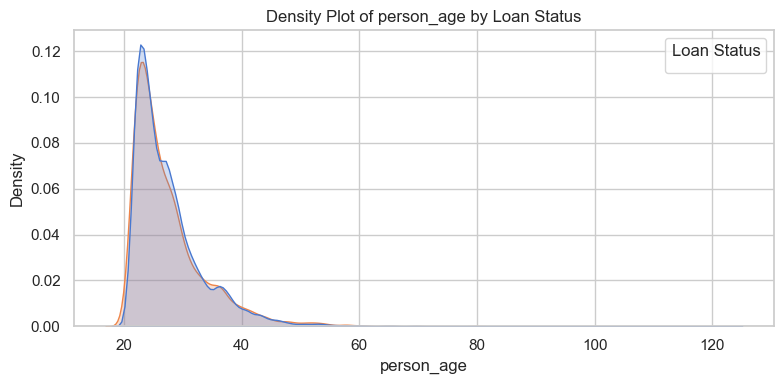

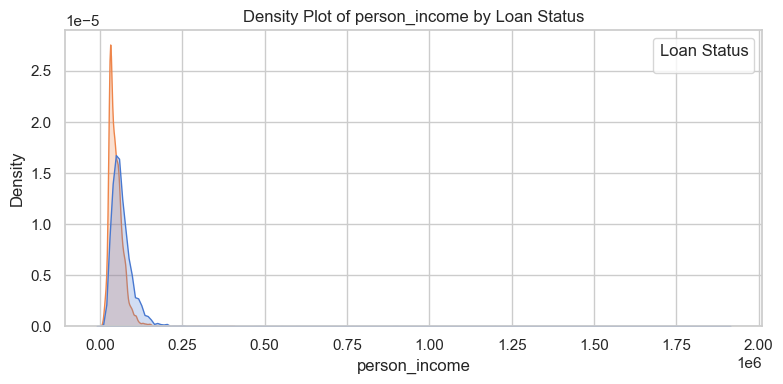

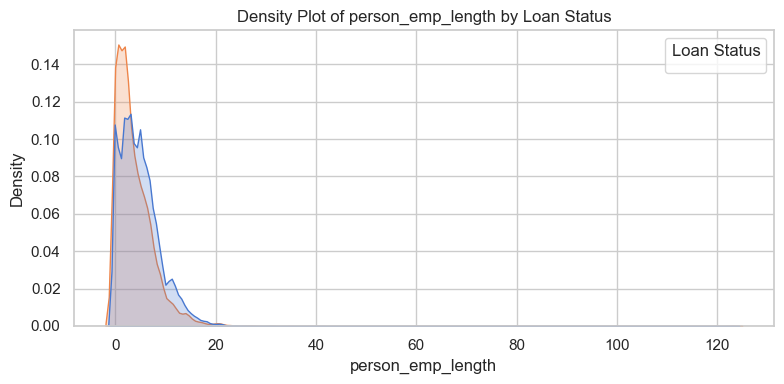

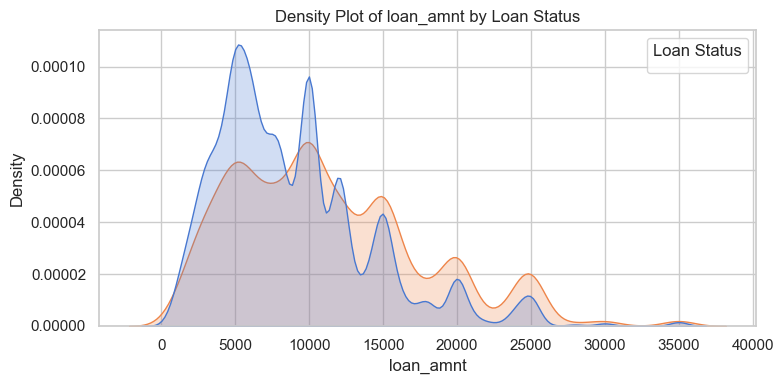

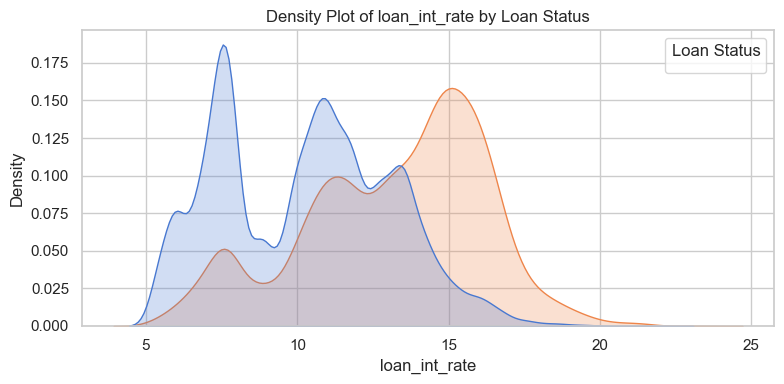

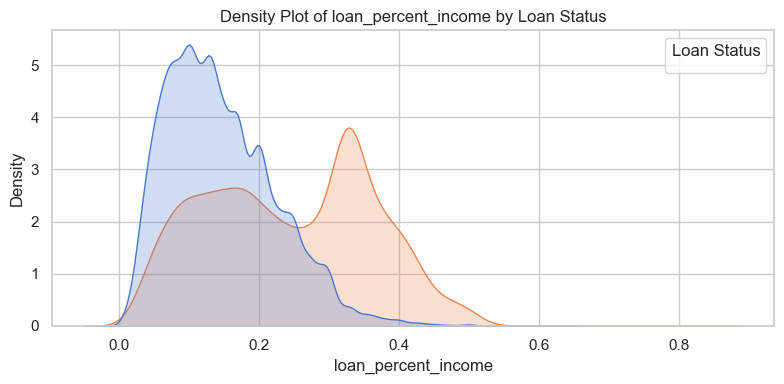

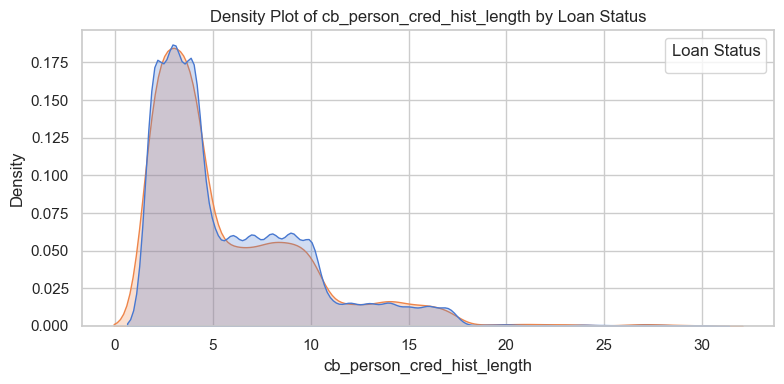

In [12]:

df1 = df.drop(columns=['id'])


numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'loan_status'] 


sns.set(style="whitegrid")


for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df1, x=col, hue='loan_status', fill=True, common_norm=False, palette='muted')
    plt.title(f'Density Plot of {col} by Loan Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Loan Status')
    plt.tight_layout()
    plt.show()


Density plots of "loan income" and "loan interest rate" show clear class seperation. I will use these as my X variables

Only two hundred rows are used in this task for easy interpetability and low computational cost in for visualisations

In [15]:
Training_data = df[["loan_percent_income","loan_int_rate","loan_status"]][:200]

In [16]:
Training_data.head()

loan_percent_income  loan_int_rate  loan_status
0                 0.17          11.49            0
1                 0.07          13.35            0
2                 0.21           8.90            0
3                 0.17          11.11            0
4                 0.10           6.92            0

In [17]:
Training_data['loan_status'] = Training_data['loan_status'].replace({0: -1, 1: 1})


In [18]:
Training_data.describe()

loan_percent_income  loan_int_rate  loan_status
count           200.000000     200.000000   200.000000
mean              0.157900      10.685300    -0.690000
std               0.091331       2.891937     0.725626
min               0.010000       5.420000    -1.000000
25%               0.080000       7.895000    -1.000000
50%               0.145000      10.990000    -1.000000
75%               0.210000      12.682500    -1.000000
max               0.500000      18.640000     1.000000

In [19]:
class Ada_boost :
    def __init__(self, x_train, y_train, T, visualize = False):
        self.x_train = np.array(x_train, dtype=np.float64)
        self.y_train = np.array(y_train, dtype=np.float64)


        #coverting 0 to -1
        self.y_train = np.array(y_train, dtype=np.float64)
        self.y_train[self.y_train == 0] = -1
     


        self.T = T
        self.h = np.zeros([T, 3], dtype=np.float64)
        self.alpha = np.zeros(T, dtype=np.float64)

        self.N = len(self.x_train)
        self.weight =np.ones(self.N, dtype=np.float64) /self.N
        self.err = np.ones(self.T, dtype=np.float64) * np.inf

        rcParams['figure.figsize'] = 35, 6
        rcParams['font.size'] = 30

        self.temp_sum = np.zeros(self.N, dtype=np.float64)
        self.temp = np.zeros(self.N, dtype=np.float64)
        self.final_label = np.zeros(self.N, dtype=np.float64)
        self.misshits = np.array([None] * (T+1), dtype=float)
        self.misshits[0] = 1.0
        self.classification_boundaries = []
        self.weight_prev = self.weight
        self.weighted_error = np.float64(0)

        self.classifier_df = []
        
        #0 - for each boosting round
        for t in range(self.T): 
        
            #1 - iterate through every feature  
            for feature in range(self.x_train.shape[1]):
                self.weighted_error = np.float64(0)
                
                #========================
                #2 - GENERATE A DECISION STUMP FOR A FEATURE
                #YOUR CODE HERE
                #========================
                threshold, sign, self.weighted_error = self.calculate_decision_stump(self.x_train[:, feature], self.weight, self.y_train)
                
        
                
                
                #========================
                #3 - KEEP TRACK OF THE FEATURE WITH THE LOWEST WEIGHTED ERROR
                #YOUR CODE HERE
                #========================        
                if self.weighted_error < self.err[t] :
                    self.err[t] = self.weighted_error
                    self.h[t] = threshold,feature,sign
                    feat = feature
        
                    
        
            #========================
            #4 - CALCULATE ALPHA FOR BOOSTING ROUND t
            #YOUR CODE HERE
            #========================            
            self.alpha[t] = self.calculate_alpha(self.weighted_error)
        
            #========================
            #5 - CLASSIFY ALL SAMPLES BASED ON THE SELECTED FEATURE FOR BOOSTING ROUND t
            #YOUR CODE HERE
            #======================== 
            classification = self.classify_dataset_against_weak_classifier(self.x_train[:,feat], self.h[t][0], self.h[t][2] )
            #print(h)
            
            #========================
            #6 - UPDATE WEIGHTS BASED ON THE CORRECTNESS OF THE CLASSIFICATION
            #YOUR CODE HERE
            #========================   
            self.weight = self.update_weights(self.weight,self.alpha[t],classification,self.y_train)
            
            #========================
            #7 - NORMALISE REASSIGNED WEIGHTS
            #YOUR CODE HERE
            #========================  
            self.weight = self.normalise_weights(self.weight)
        
            
            #--------------------------------------------
            #BOOSTING ALGORITHM DONE
            #--------------------------------------------
            if visualize:
                self.visualise(self.x_train, self.h, t, self.y_train, self.weight)
        self.classifier_df = pd.DataFrame(self.h, columns=["threshold", "feature", "direction"])
        
        self.classifier_df["alpha"] = self.alpha

        
        
    def calculate_decision_stump(self,data, weights, labels):
        """
        Calculate the best decision stump for a given feature.
        
        Args:
        data : Dataset containing just a single feature (Series or 1-column DataFrame)
        weights: Sample weights (same shape as labels)
        labels: Sample class labels (+1 or -1)
        
        Returns:
        tuple: (best_threshold, best_direction, min_error)
        """
        data = pd.DataFrame(data)  # Ensure it's in DataFrame format
        min_error = float('inf')   # Start with a high error
        best_thresh = 0
        best_dir = 0
    
        # Create a list of possible thresholds
        feature_min = data.min().iloc[0]
        feature_max = data.max().iloc[0]
        interval = (feature_max - feature_min) / 100.0
        thresholds = pd.interval_range(start=feature_min - 2 * interval, 
                                       end=feature_max + 2 * interval, 
                                       freq=interval) 
        
        for direction in [1, -1]:
            for thresh in thresholds:
                if direction == 1:
                    predictions = (data >= thresh.left).astype(int) * 2 - 1
                else:
                    predictions = (data < thresh.left).astype(int) * 2 - 1
    
                predictions = predictions.values.flatten()  # Convert DataFrame to 1D array
                
                # ========================
                # Calculate misclassifications
                misclassifications = (predictions != labels).astype(int)
    
                # Calculate weighted error
                weighted_error = (weights * misclassifications).sum()
                # ========================
                
                if weighted_error < min_error:
                    # ========================
                    min_error = weighted_error
                    best_thresh = thresh.left
                    best_dir = direction
                    # ========================
    
        return best_thresh, best_dir, min_error

    def calculate_alpha(self,weighted_error):    
    #========================
    #YOUR CODE HERE
    #========================
    
        return 0.5 * np.log( (1 - weighted_error)/ weighted_error)

    def classify_dataset_against_weak_classifier(self,x, thresh, direction):
        classification = np.zeros(len(x))
    
        for i in range(len(x)):
            if direction == -1:
                if x[i] < thresh:
                    classification[i] = 1
                else:
                    classification[i] = -1
            else:
                if x[i] >= thresh:
                    classification[i] = 1
                else:
                    classification[i] = -1
    
        return classification

    def update_weights(self,weight, alpha, classification, label):
        for i in range(len(weight)):
            weight[i] = weight[i] * np.exp(-alpha * label[i] * classification[i])
        return weight

    def normalise_weights(self,weight):
        weight = weight / np.sum(weight)
        return weight


    def visualise(self,x, h, t, label, weight):
        #global temp_sum
        #global final_label
        #global weight_prev
     

        #Visualisation
        f, axarr = plt.subplots(1, 5)
        #====================================================================
        # 1 Dataset Weighting Update and Decision Boundary
        #print h[t]
        temp = h[t][2] * np.sign(x[:, int(h[t][1]) ] - h[t][0])
        self.temp_sum = np.float64(self.temp_sum + self.alpha[t] * temp)
        #temp_sum = temp_sum - np.float64(0.000000000001)
        self.final_label = np.sign(self.temp_sum)
        self.misshits[t+1] = np.sum(np.float64(self.final_label != label)) / self.N
    
        time.sleep(0)
        
        print('X', range(len(x)))
        print('axarr', axarr)
        
        scale_markers = [w / (np.max(self.weight_prev) - np.min(self.weight_prev)) for w in self.weight_prev] 
        #plot weighted samples
        for l in range(len(x)):
            #print l
            #print x[l,0],x[l,1]
            if label[l] == 1:
                axarr[0].plot([x[l,0]],[x[l,1]], 'bo', markersize=scale_markers[l] * 10.0)
    
            else:
                axarr[0].plot(x[l,0],x[l,1], 'ro', markersize=scale_markers[l]* 10.0)
    
    
        if h[t][1]  == 0 :
            axarr[0].plot((h[t][0], h[t][0]), (3, -3), 'k-')
            self.classification_boundaries.append( ((h[t][0], h[t][0]), (3, -3)) )
        else: 
            axarr[0].plot((3, -3), (h[t][0], h[t][0]), 'k-')
            self.classification_boundaries.append( ((3, -3), (h[t][0], h[t][0])))
            
        axarr[0].set_title("Dataset Weighting Update and Decision Boundary \n", fontsize=15, alpha=0.75)
    
        #====================================================================
        # 2 Dataset Classification for Weak Classifier t
        temp = h[t][2] * np.sign(x[:, int(h[t][1]) ] - h[t][0])
        temp_sum2 = np.float64(self.alpha[t] * temp)
        classification = np.sign(temp_sum2)
        
        
        for l in range(len(x)):
            if classification[l] == 1:
                axarr[1].plot([x[l,0]],[x[l,1]], 'bo')
    
            else:
                axarr[1].plot(x[l,0],x[l,1], 'ro')
    
    
        if h[t][1]  == 0 :
            axarr[1].plot((h[t][0], h[t][0]), (3, -3), 'k-')
        else: 
            axarr[1].plot((3, -3), (h[t][0], h[t][0]), 'k-')
    
        axarr[1].set_title("Dataset Classification for Weak Classifier t \n", fontsize=15, alpha=0.75)
        
        #====================================================================
        
        # 3 Final Classification of Samples from Current Strong Classifier H
        pos1 = np.where(self.final_label == 1)
        pos2 = np.where(self.final_label == -1)
    
        axarr[2].plot(x[pos1, 0], x[pos1, 1], 'bo')
        axarr[2].plot(x[pos2, 0], x[pos2, 1], 'ro')
        axarr[2].axis([-3.1, 3.1, -3.1, 3.1])
        
        #print len(classification_boundaries)
        for p1, p2 in self.classification_boundaries:
            #print 'decision: ' , p1, p2
            axarr[2].plot(p1, p2, 'k-')
        
        axarr[2].set_title("Final Classification of Samples from \n Current Strong Classifier H", fontsize=15, alpha=0.75)
    
        
        #====================================================================
        # 4 Missclassified Samples from Current Strong Classifier H
        correct = np.where(self.final_label == label)
        wrong = np.where(self.final_label != label)
        
        axarr[3].plot(x[correct, 0], x[correct, 1], 'ko')
        axarr[3].plot(x[wrong, 0], x[wrong, 1], 'rv')
        axarr[3].axis([-3.1, 3.1, -3.1, 3.1])
        axarr[3].set_title("Missclassified Samples from \nCurrent Strong Classifier H", fontsize=15, alpha=0.75)
        
        #====================================================================
        # 5 Convergence Rate of the Total Error
        axarr[4].plot(self.misshits)
        axarr[4].axis([ 0, self.T, 0, 1])
        axarr[4].set_title(" Convergence Rate of the Total Error", fontsize=15, alpha=0.75)
        axarr[4].set_ylabel("Error Rate", fontsize=15, alpha=0.75)
        
        self.weight_prev = weight
        print('BOOSTING ROUND: ' + str(t+1))
        print('WEIGHTED ERROR OF DECISION BOUNDARY: ' + str(self.err[t]), '--->> FEATURE, THRESHOLD, DIRECTION: ' + str( (int(h[t][1]), h[t][0], h[t][2]) ) )
        print('CURRENT ERROR: ' + str(self.misshits[t+1]) )
        #print("--- %s seconds ---" % (time.time() - start_time))
        plt.show()

    def classify_sample(self,xi, boost_classif):
        boost_classif = boost_classif.values
        classification_sum = np.float64(0)
    
        for thresh, feat, sign, alpha in boost_classif:
            #=======================
            #YOUR CODE HERE
            #=======================
            ht = np.sign(xi[int(feat)] - thresh) * sign
            classification_sum += alpha * ht
    
        if classification_sum >= 0:
            return 1
        else:
            return -1

    def predict(self,test_set_x): # make a function that returns an array of predicted variables
            prediction = []
            
            for i in range(len(test_set_x)):
                if self.classify_sample(test_set_x[i], self.classifier_df) == 1:
                    prediction.append(1)
                else:
                    prediction.append(-1)
            return prediction
    def sum_classifier_votes_for_each_sample(self, dataset, df, classifier_df):
        for i in range(len(dataset)):
            classification_sum = np.float64(0)
            neg_votes = np.float64(0)
            pos_votes = np.float64(0)
    
            for idx, thresh, feat, sign, alpha in classifier_df.itertuples():
                prediction = sign * np.sign(dataset[i, int(feat)] - thresh)
                vote = alpha * prediction
                classification_sum += vote
                
                if prediction > 0:
                    pos_votes += vote
                else:
                    neg_votes += abs(vote)
    
            # Store results in the dataframe
            df['sum_alpha'].iloc[i] = classification_sum
            df['pos_votes'].iloc[i] = pos_votes
            df['neg_votes'].iloc[i] = neg_votes
    
        return df
    def margin_calculation(self,sign, pos, neg, tot_votes):
        
        return max(pos, neg) / tot_votes


    def predict_proba(self,test_set_x):
        test_set_x_df = pd.DataFrame(test_set_x)
        test_set_x_df['sum_alpha'] = 0 
        test_set_x_df['pos_votes'] = 0 
        test_set_x_df['neg_votes'] = 0
        test_set_x_df = self.sum_classifier_votes_for_each_sample(test_set_x, test_set_x_df, self.classifier_df)
        total_alpha_votes = np.sum(self.classifier_df.alpha)
        test_set_x_df['total_alpha_votes'] = total_alpha_votes
        test_set_x_df['margin'] = test_set_x_df[['sum_alpha','pos_votes','neg_votes','total_alpha_votes']].apply(lambda x: self.margin_calculation(*x), axis=1)
        test_set_x_df['classification'] = self.predict(test_set_x)
        test_set_x_df['probabilities'] = test_set_x_df.apply( lambda x: 1.0 - x.margin if x.classification == -1 else x.margin, axis = 1)
        return test_set_x_df['probabilities']
                
                        
    
            

standardazing the data so they can be seen more crealrly in the visualization . Z-score can rescale the data.

In [21]:
X = Training_data.drop("loan_status",axis = 1)
Y = Training_data["loan_status"]

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X = Training_data.drop("loan_status",axis = 1)
Y = Training_data["loan_status"]

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 1
WEIGHTED ERROR OF DECISION BOUNDARY: 0.135 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(1.6036954482839523), np.float64(1.0))
CURRENT ERROR: 0.135


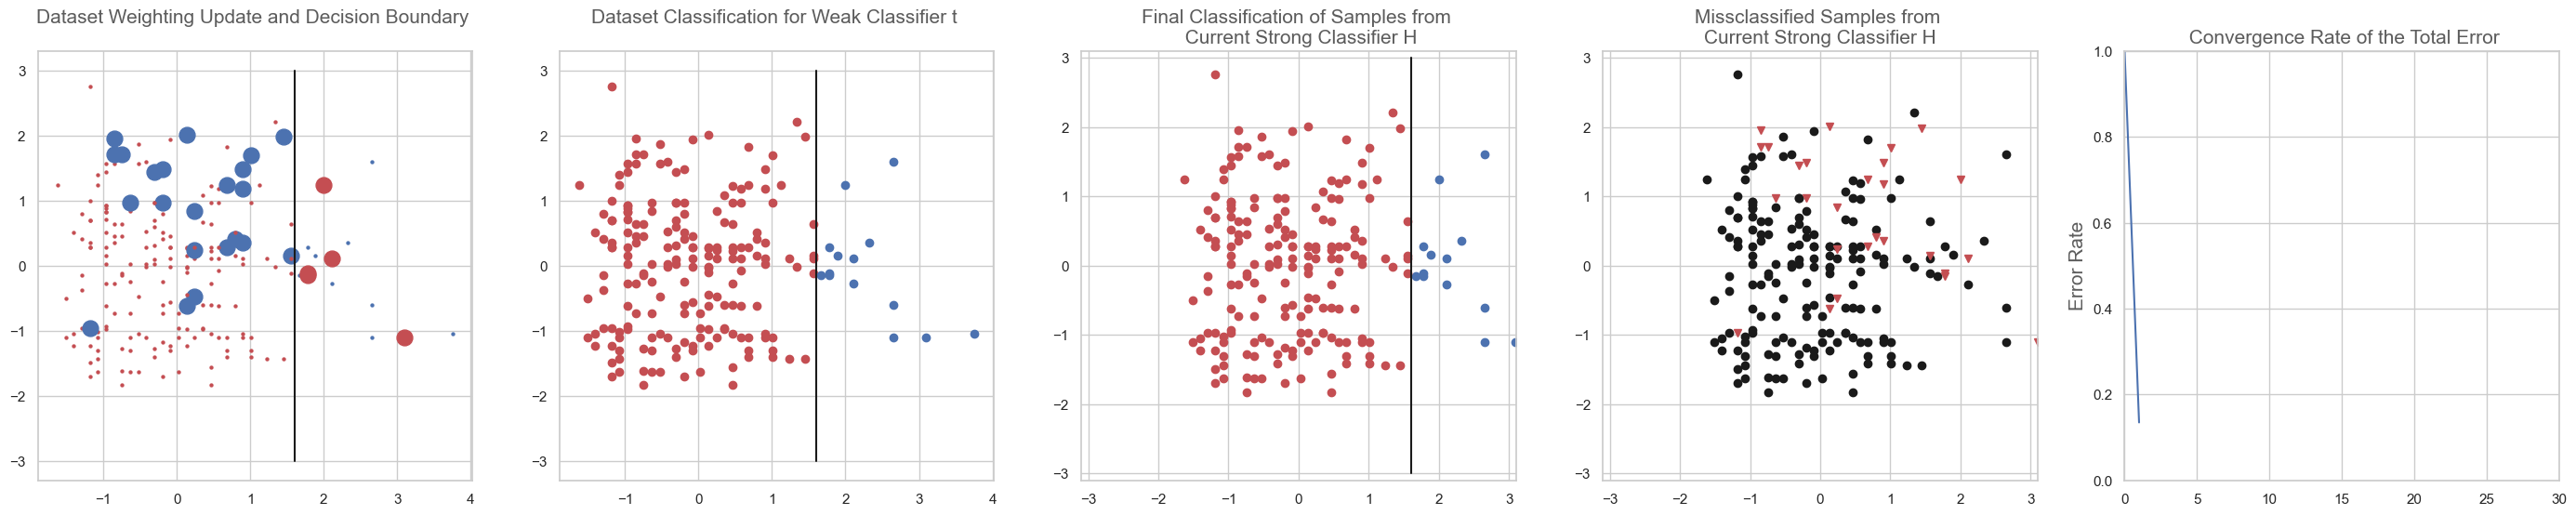

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 2
WEIGHTED ERROR OF DECISION BOUNDARY: 0.26380368098159507 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(0.8327733146348606), np.float64(1.0))
CURRENT ERROR: 0.135


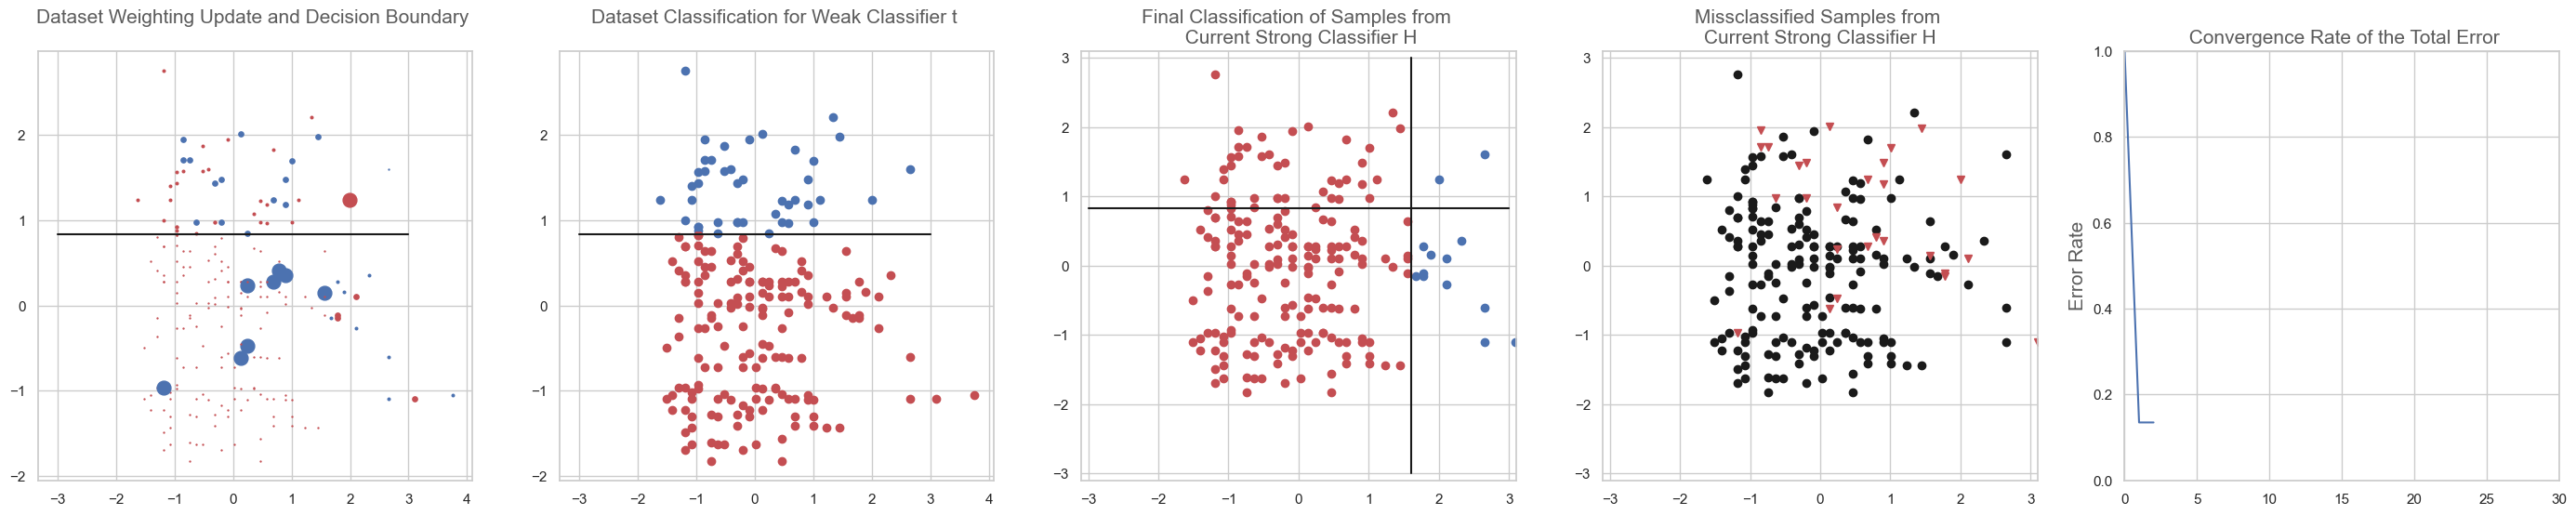

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 3
WEIGHTED ERROR OF DECISION BOUNDARY: 0.35224483204134366 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(0.04390678845404561), np.float64(1.0))
CURRENT ERROR: 0.135


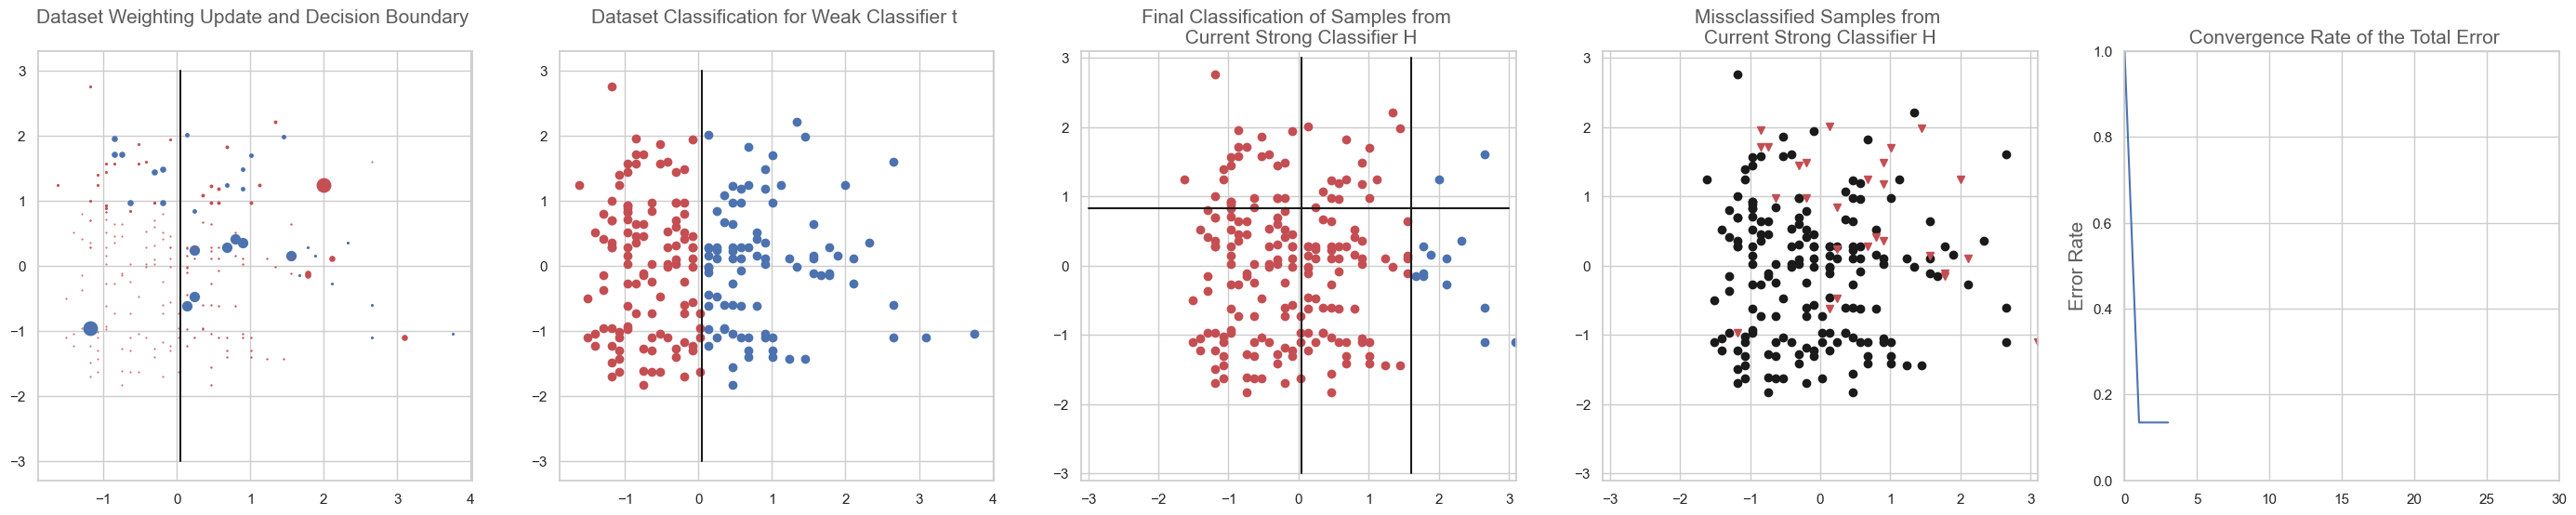

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 4
WEIGHTED ERROR OF DECISION BOUNDARY: 0.39422813285044866 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(1.4285374650454965), np.float64(1.0))
CURRENT ERROR: 0.125


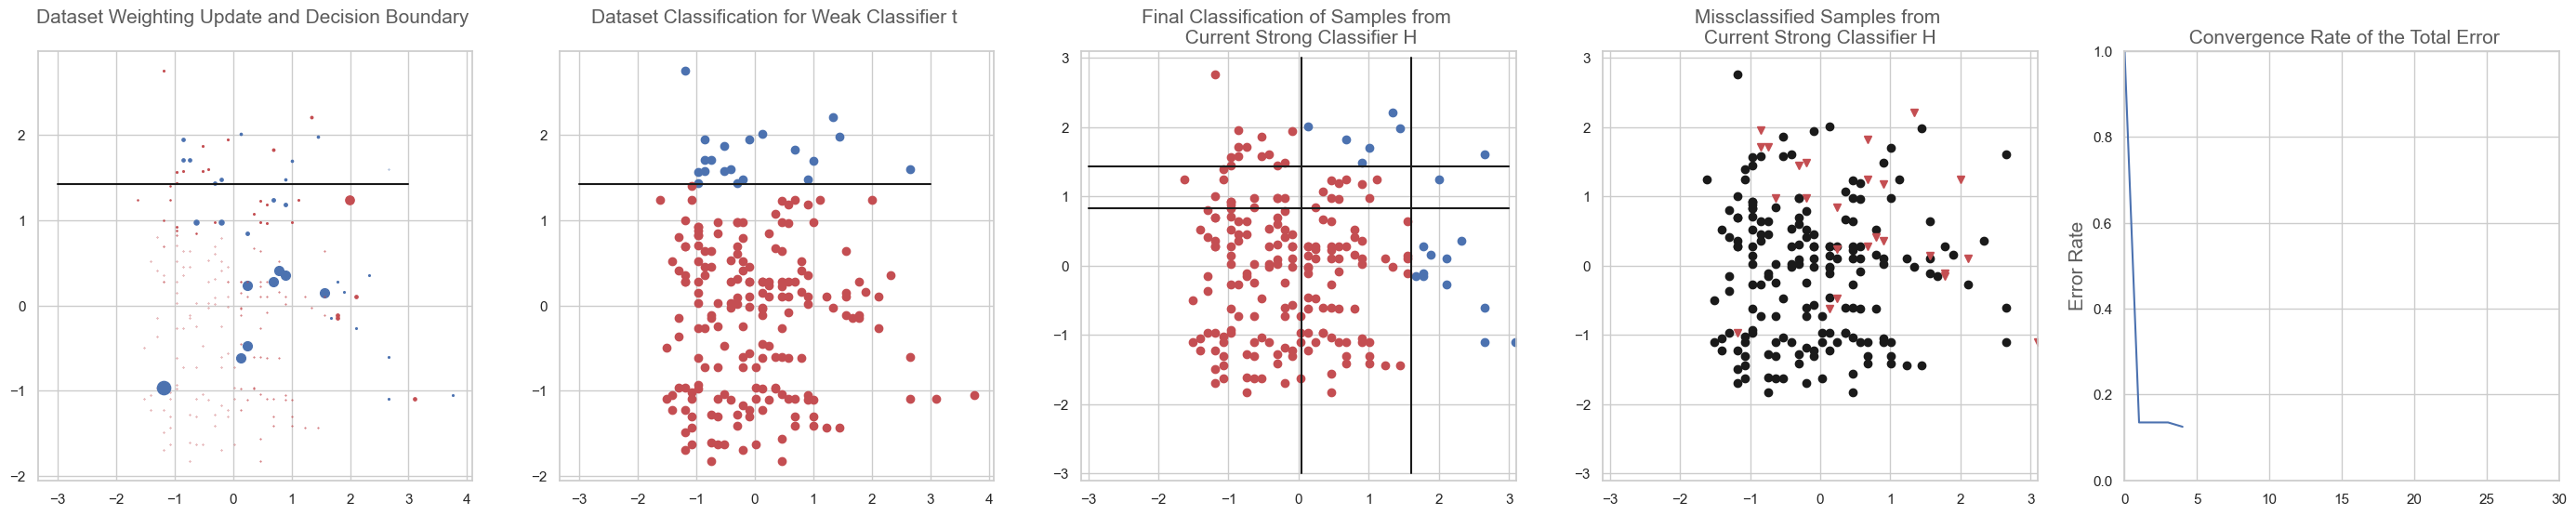

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 5
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3972896493387601 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(-1.0003471481670954), np.float64(1.0))
CURRENT ERROR: 0.125


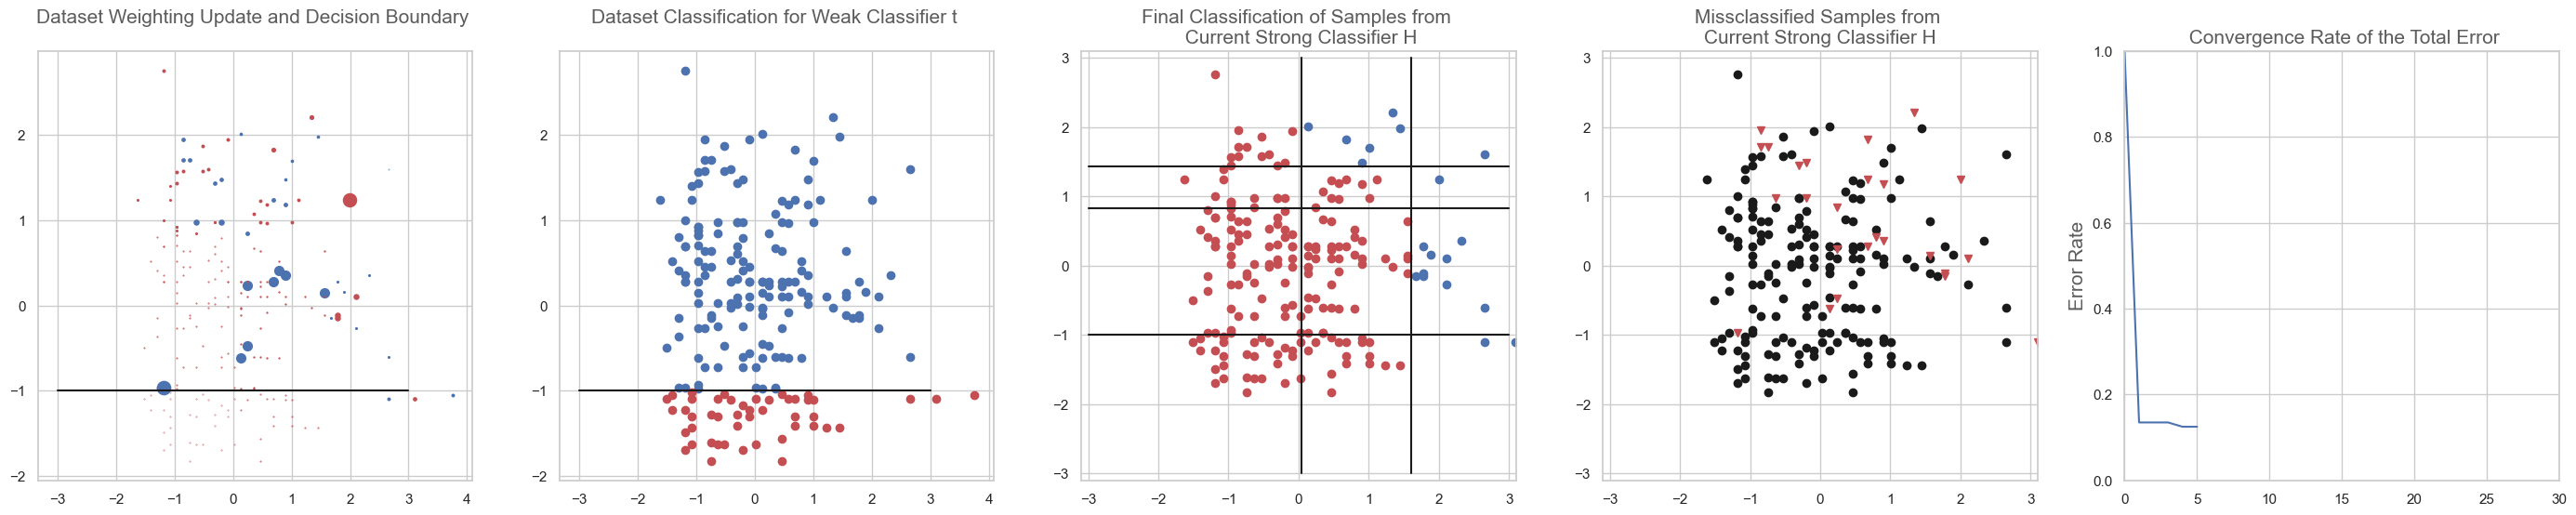

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 6
WEIGHTED ERROR OF DECISION BOUNDARY: 0.41628202731701713 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(0.5817649470160826), np.float64(1.0))
CURRENT ERROR: 0.125


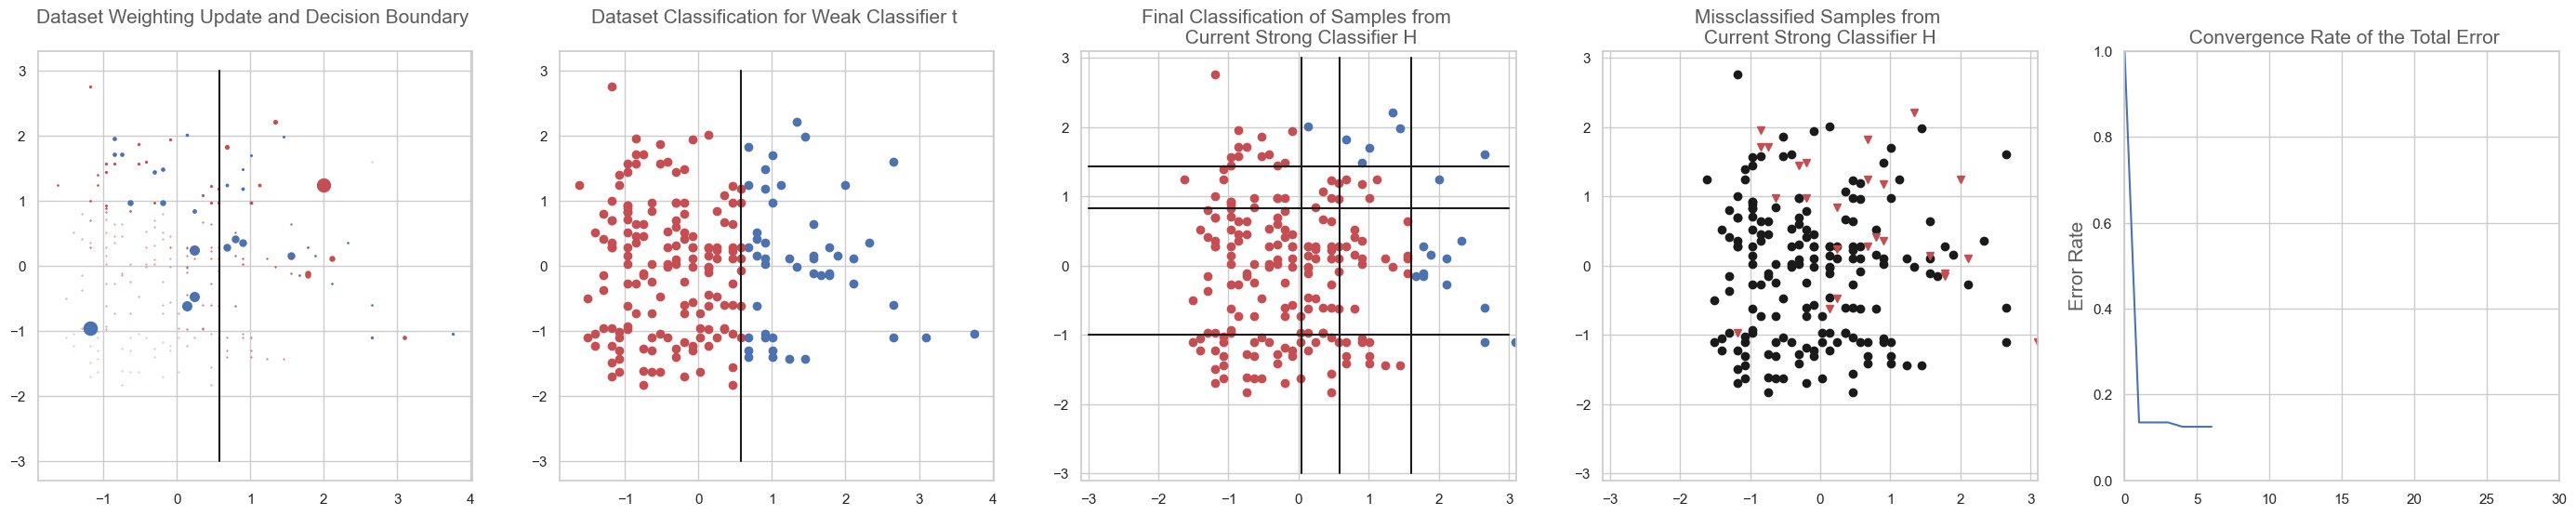

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 7
WEIGHTED ERROR OF DECISION BOUNDARY: 0.42760968013391976 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(0.4203212105044203), np.float64(-1.0))
CURRENT ERROR: 0.13


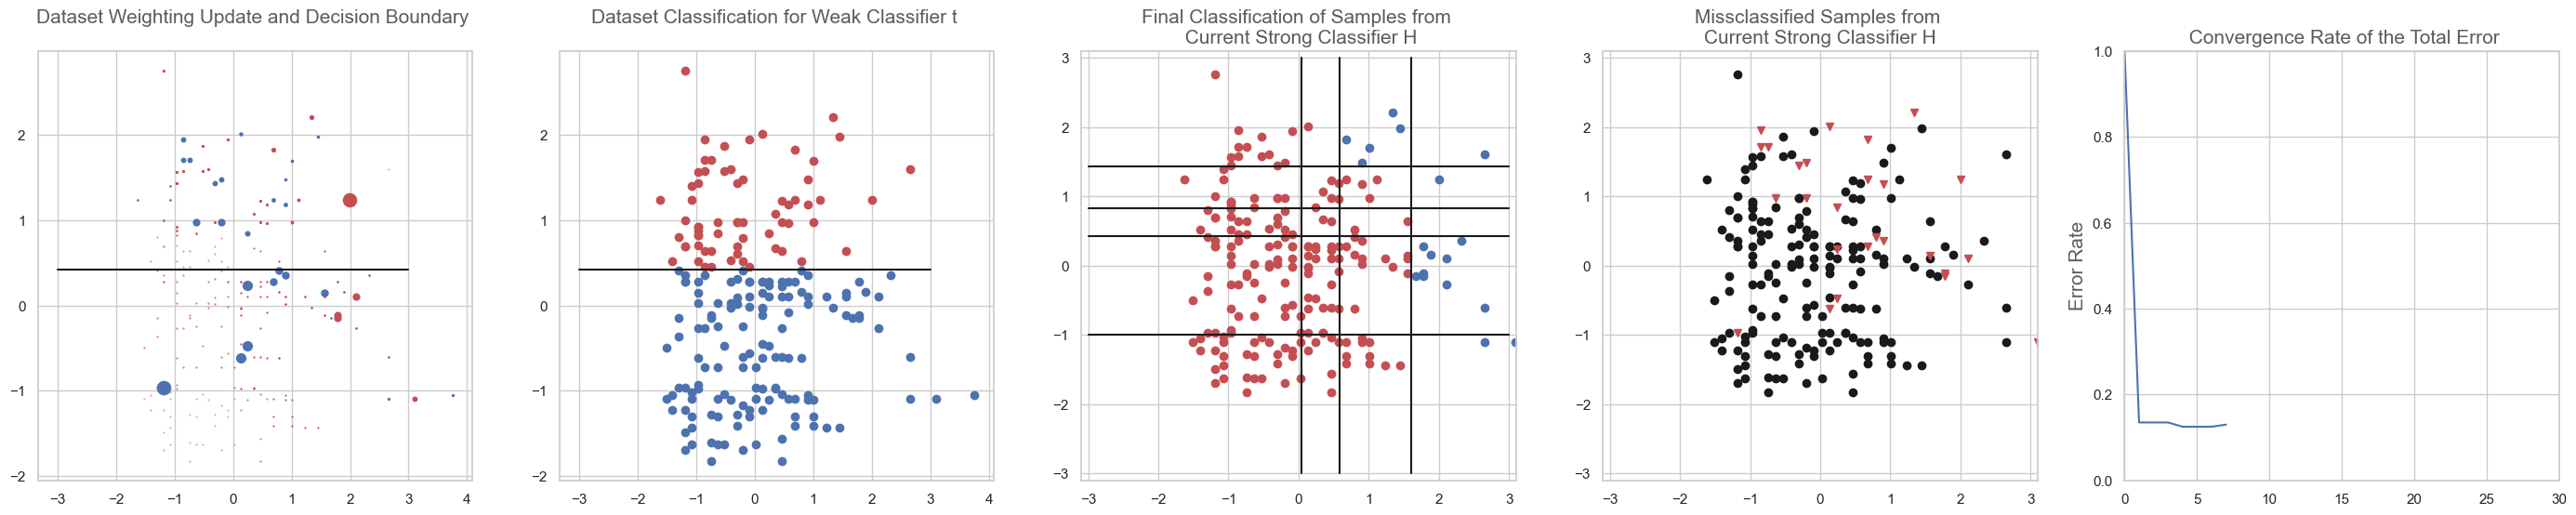

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 8
WEIGHTED ERROR OF DECISION BOUNDARY: 0.41287094821724146 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(0.14535314108412734), np.float64(1.0))
CURRENT ERROR: 0.125


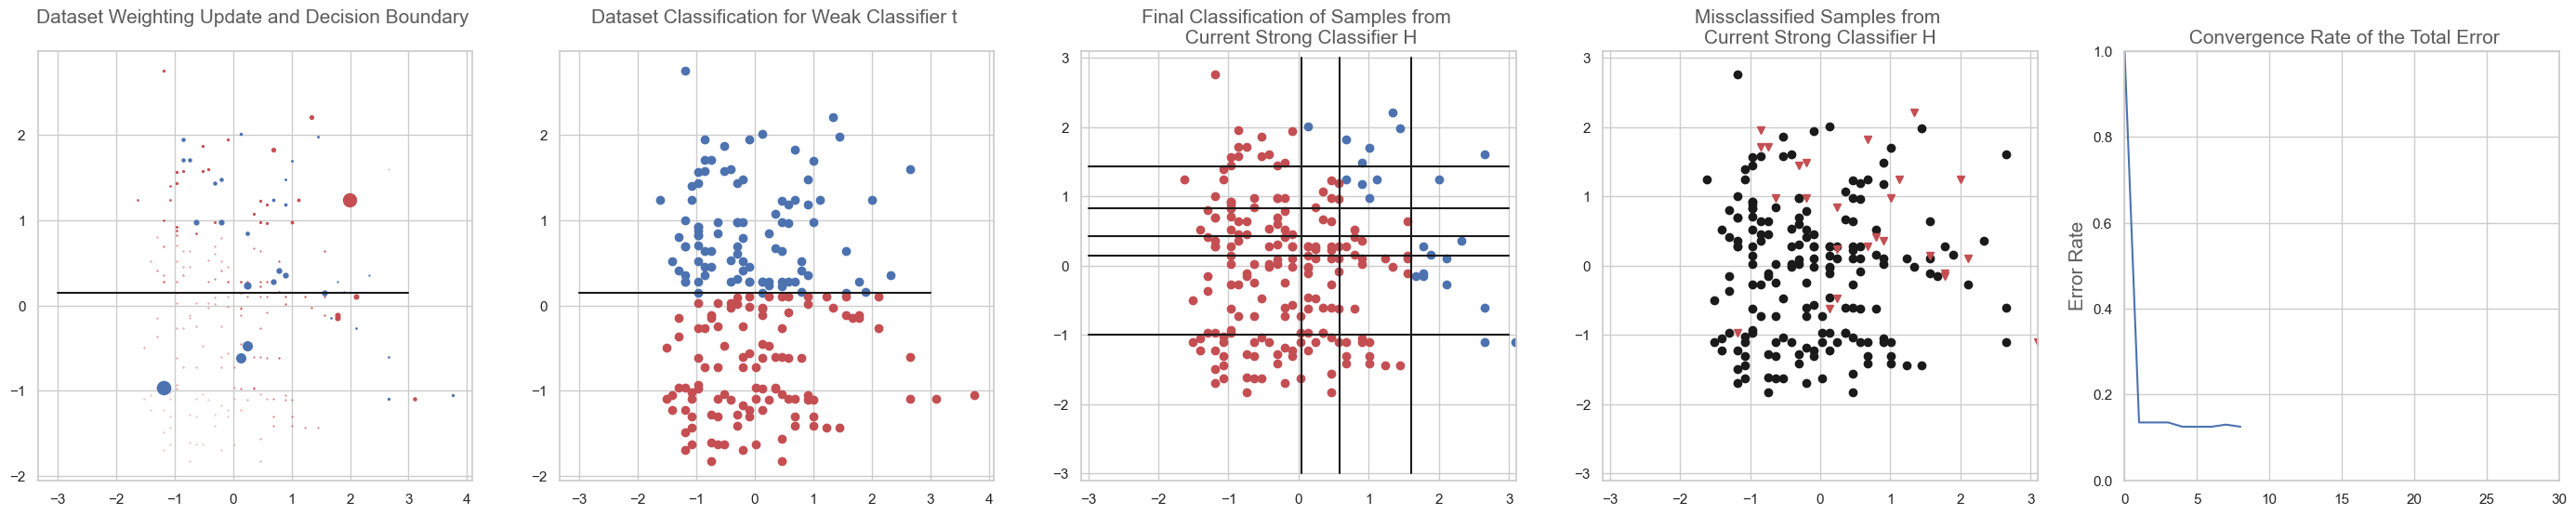

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 9
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3909286623137637 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(-0.45041100932650857), np.float64(-1.0))
CURRENT ERROR: 0.13


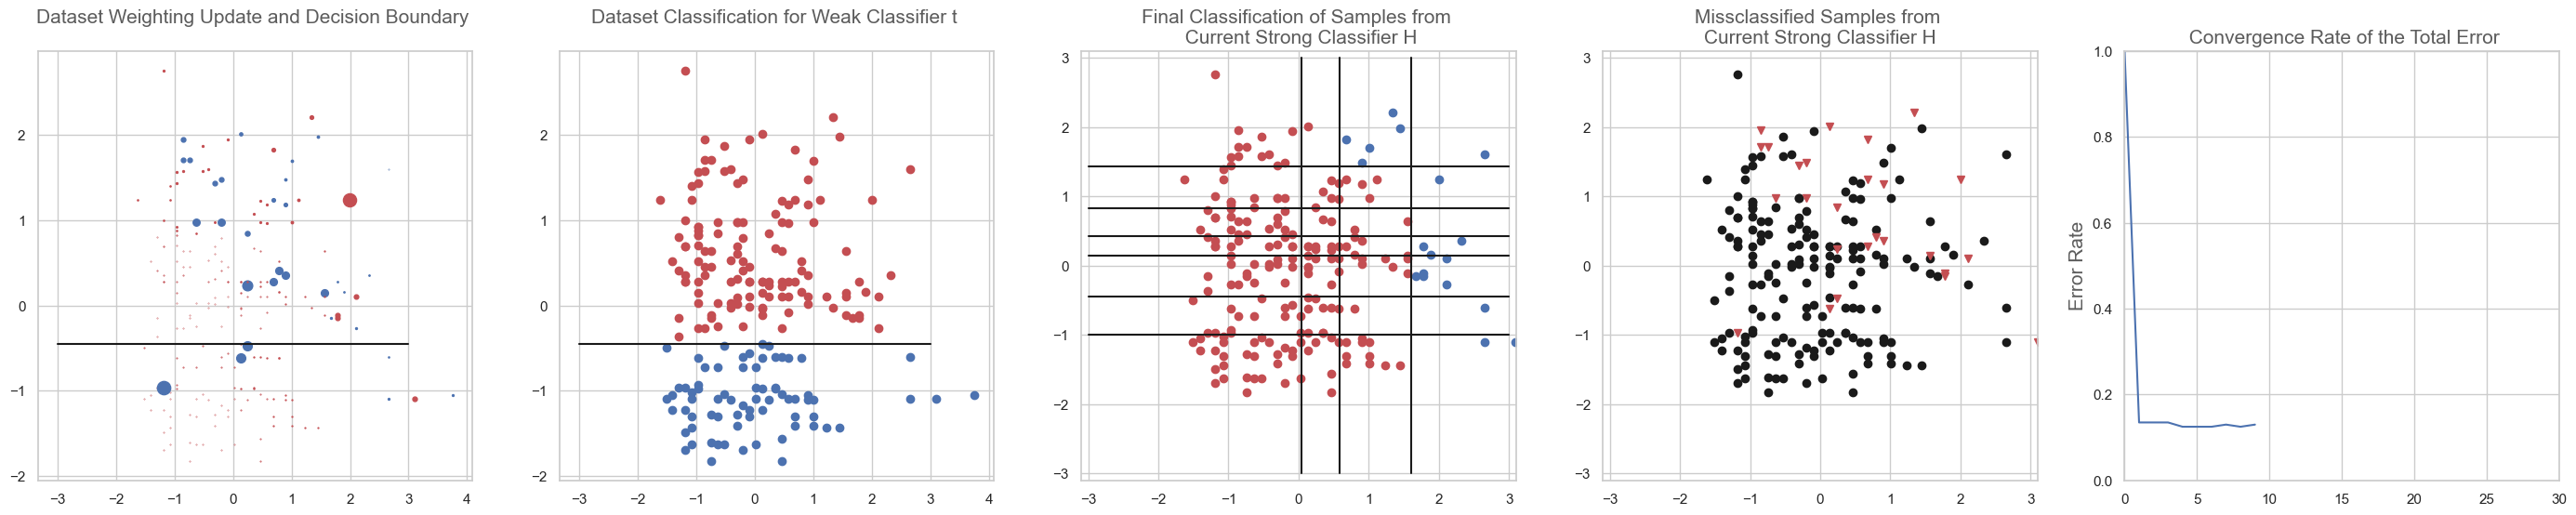

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 10
WEIGHTED ERROR OF DECISION BOUNDARY: 0.41486214245298947 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(0.14535314108412734), np.float64(1.0))
CURRENT ERROR: 0.125


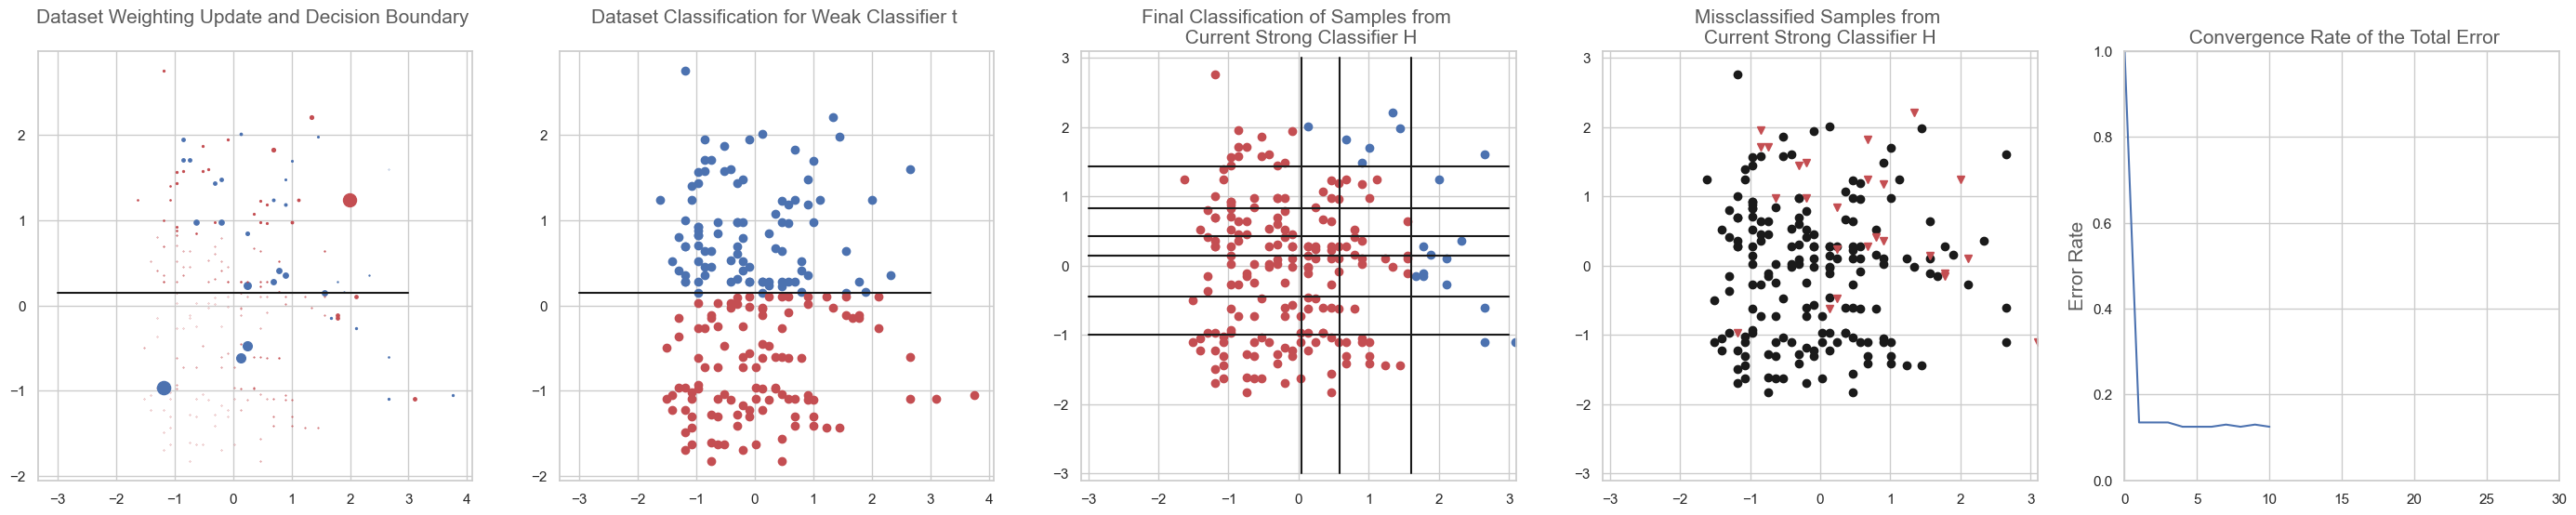

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 11
WEIGHTED ERROR OF DECISION BOUNDARY: 0.42916731789009477 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(-0.267098963046313), np.float64(-1.0))
CURRENT ERROR: 0.13


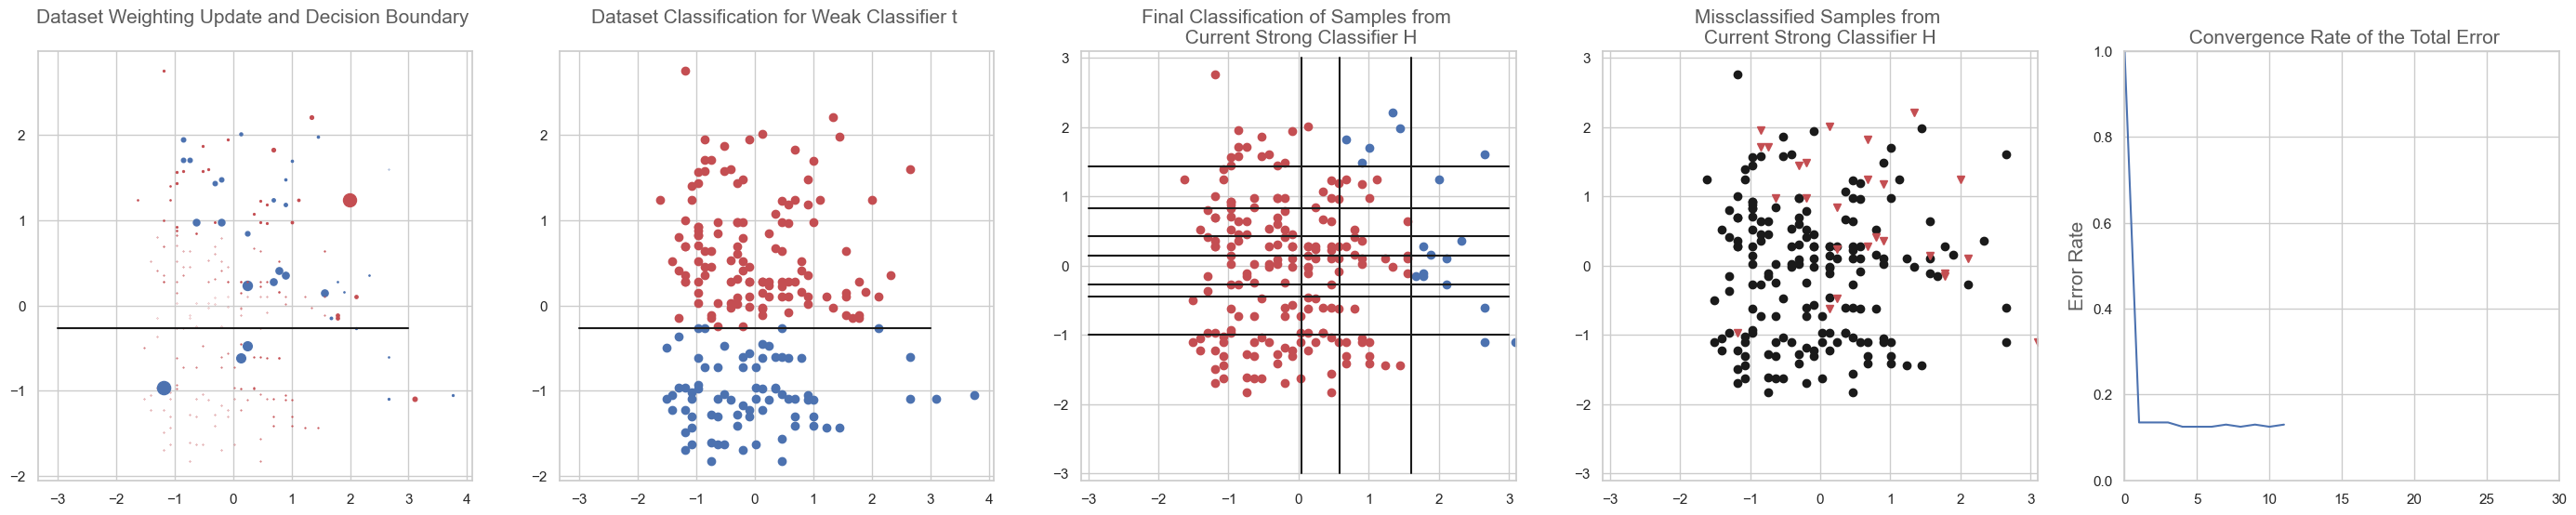

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 12
WEIGHTED ERROR OF DECISION BOUNDARY: 0.43411112860817747 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(-1.0003471481670954), np.float64(1.0))
CURRENT ERROR: 0.125


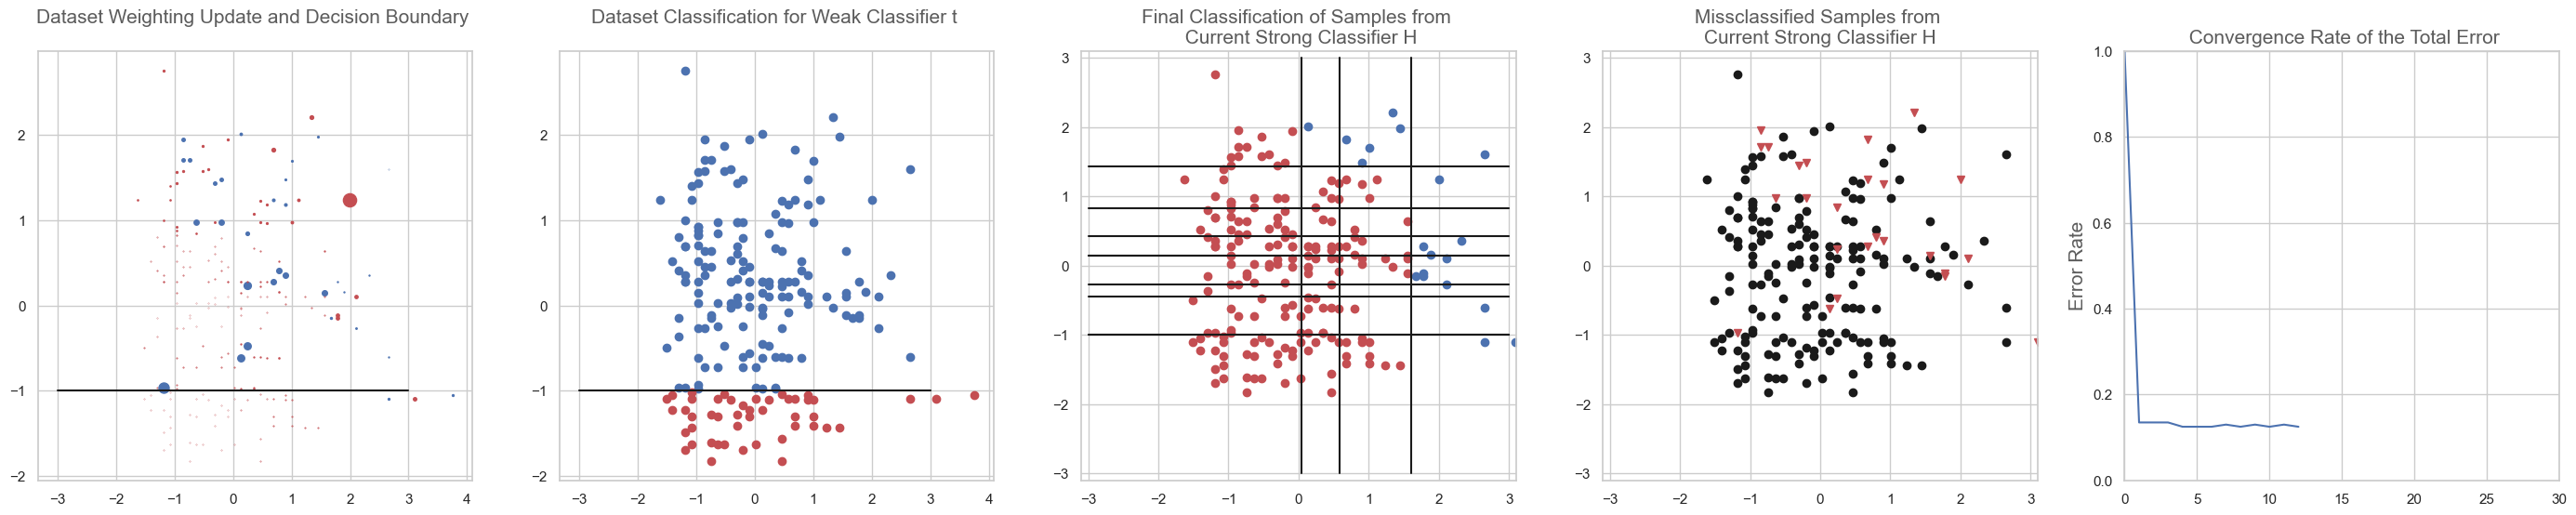

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 13
WEIGHTED ERROR OF DECISION BOUNDARY: 0.4211274427162007 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(1.611849511325692), np.float64(1.0))
CURRENT ERROR: 0.125


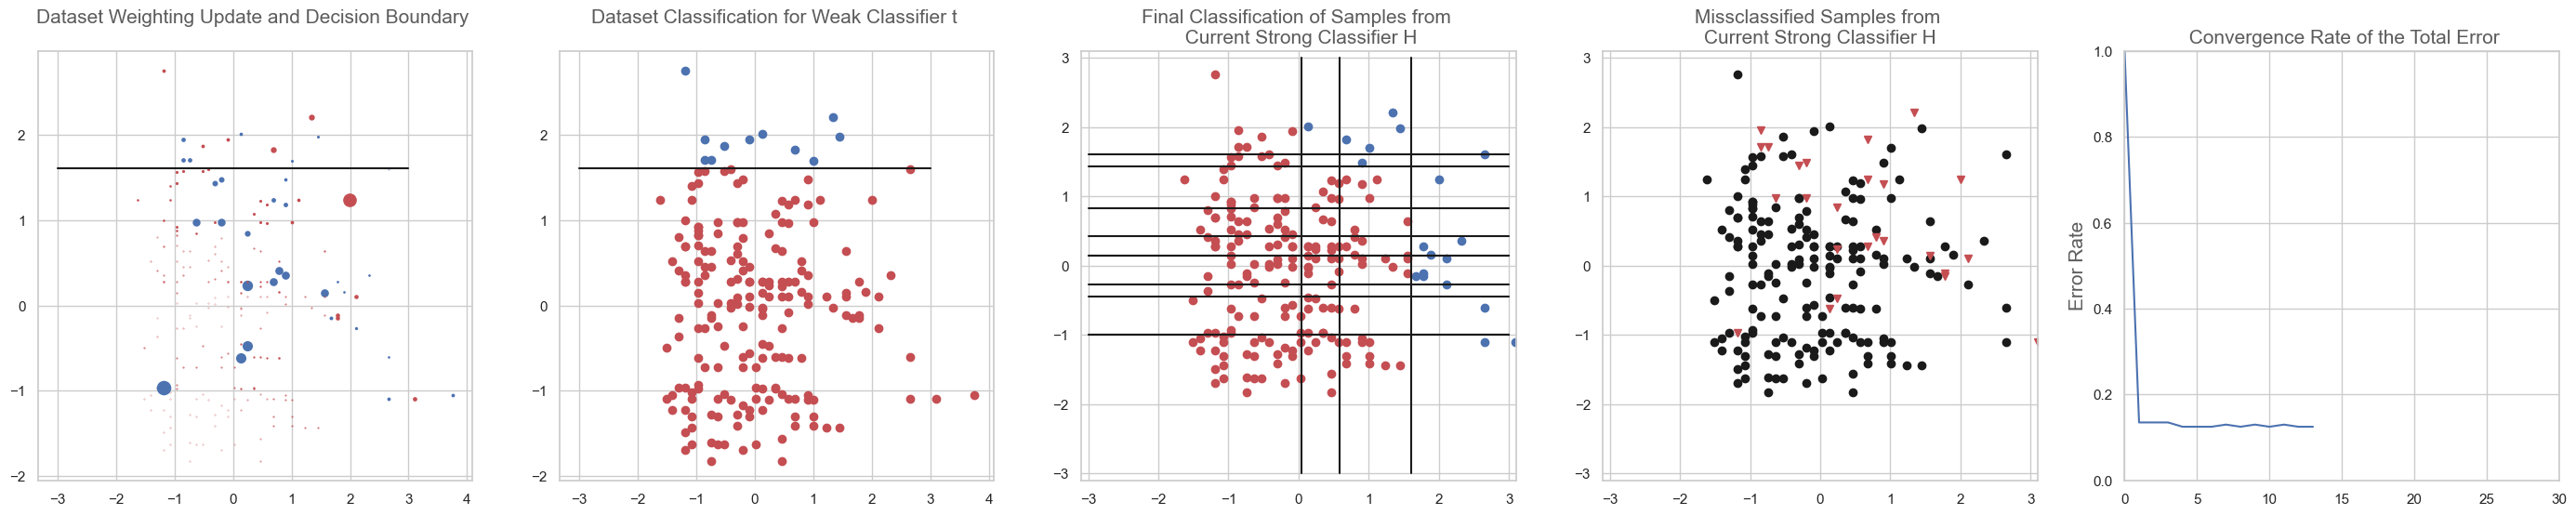

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 14
WEIGHTED ERROR OF DECISION BOUNDARY: 0.43037485127521186 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(0.4203212105044203), np.float64(-1.0))
CURRENT ERROR: 0.125


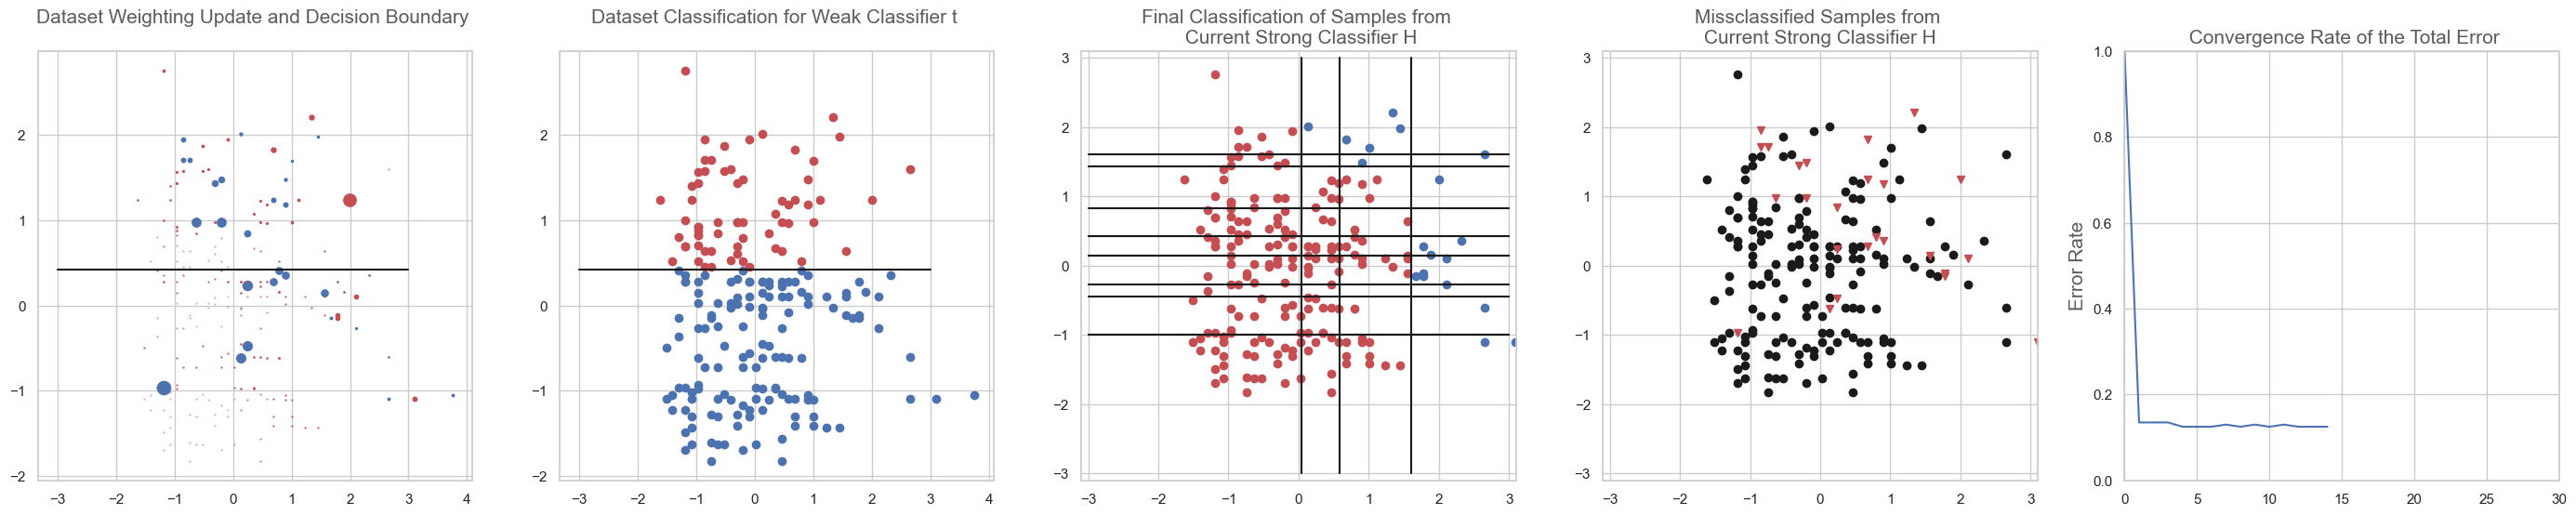

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 15
WEIGHTED ERROR OF DECISION BOUNDARY: 0.4227916116228684 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(0.14535314108412734), np.float64(1.0))
CURRENT ERROR: 0.125


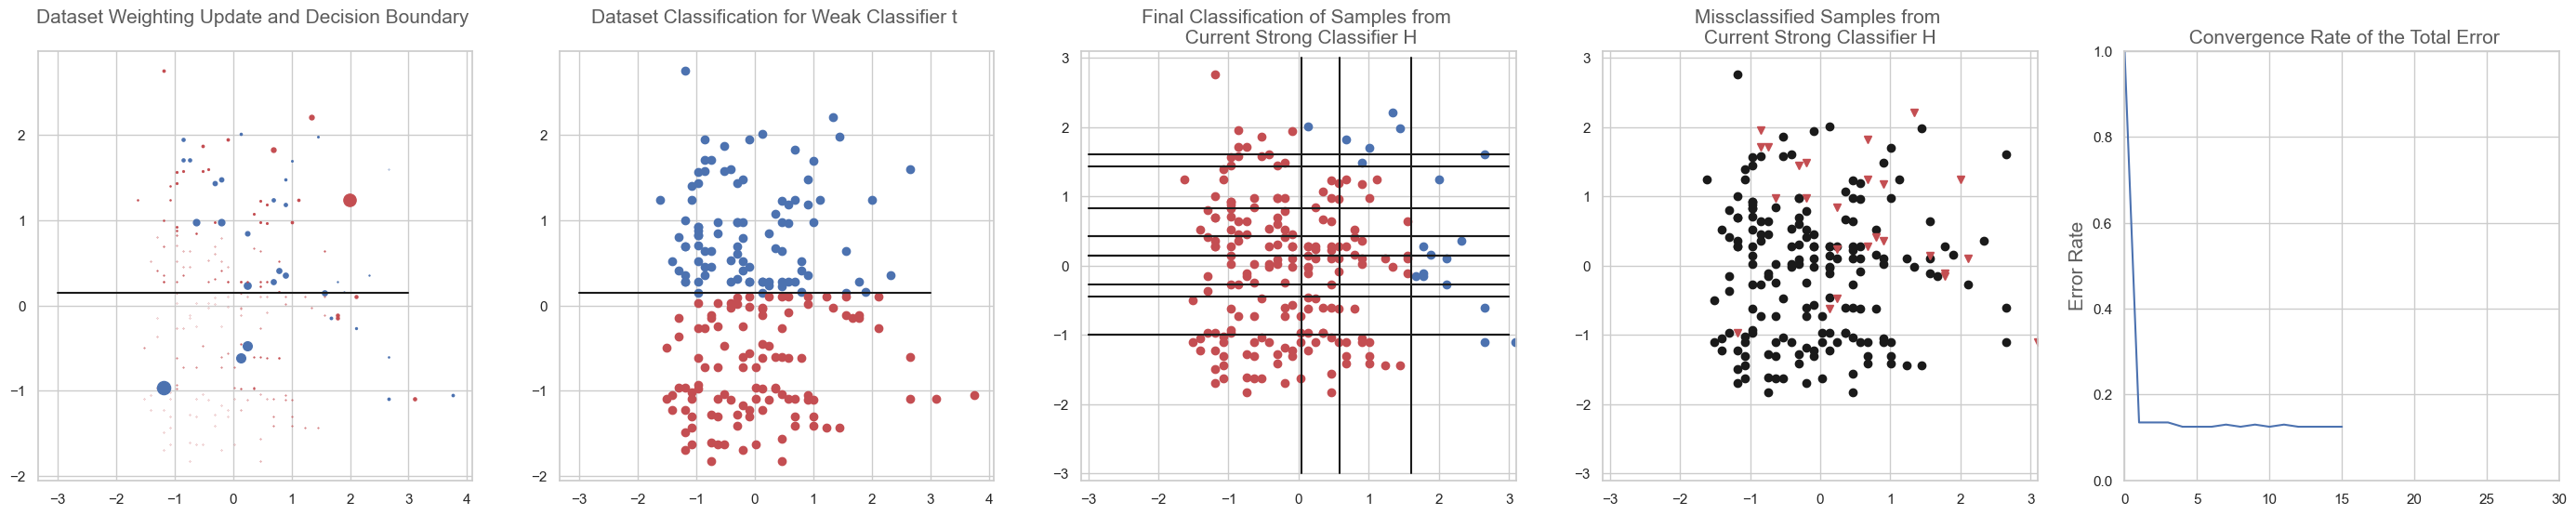

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 16
WEIGHTED ERROR OF DECISION BOUNDARY: 0.4371846857943804 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(0.2590500518788603), np.float64(-1.0))
CURRENT ERROR: 0.115


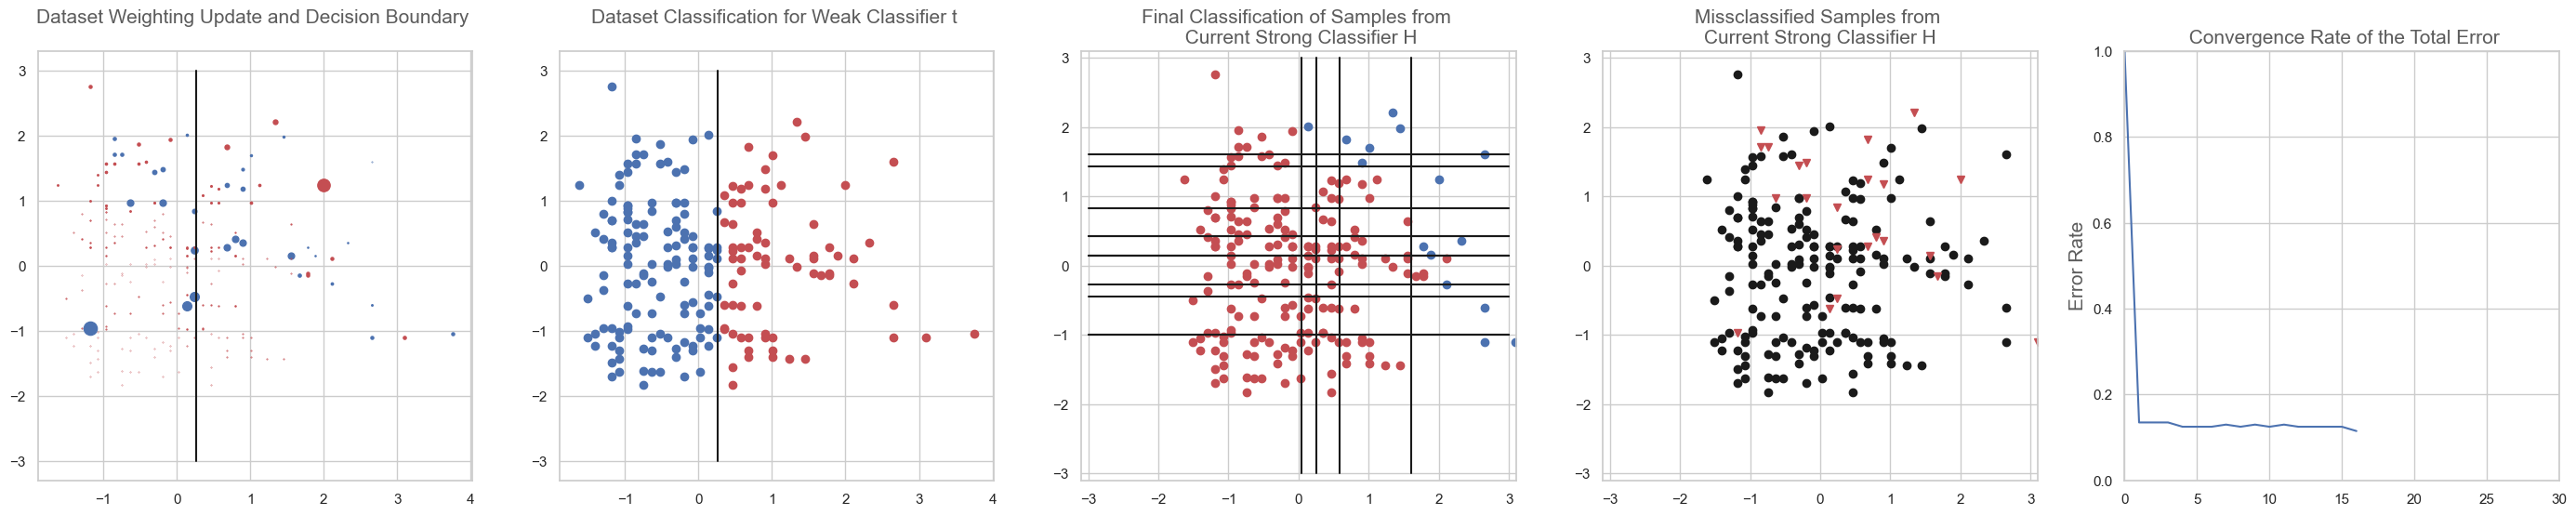

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 17
WEIGHTED ERROR OF DECISION BOUNDARY: 0.42874818279669547 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(0.04390678845404561), np.float64(1.0))
CURRENT ERROR: 0.125


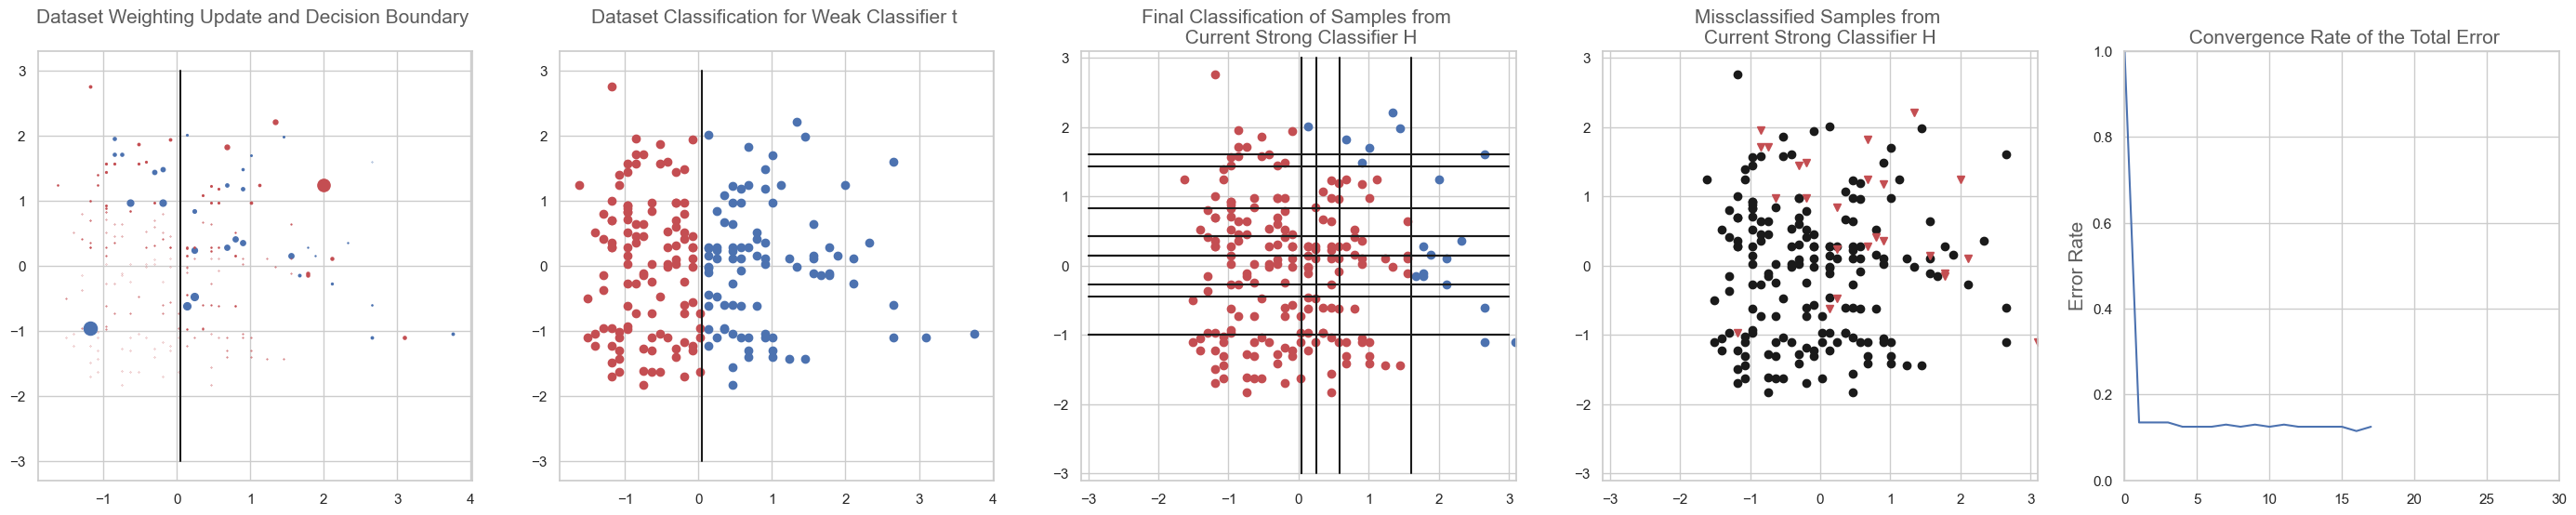

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 18
WEIGHTED ERROR OF DECISION BOUNDARY: 0.4315743837363054 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(2.141553606845989), np.float64(1.0))
CURRENT ERROR: 0.115


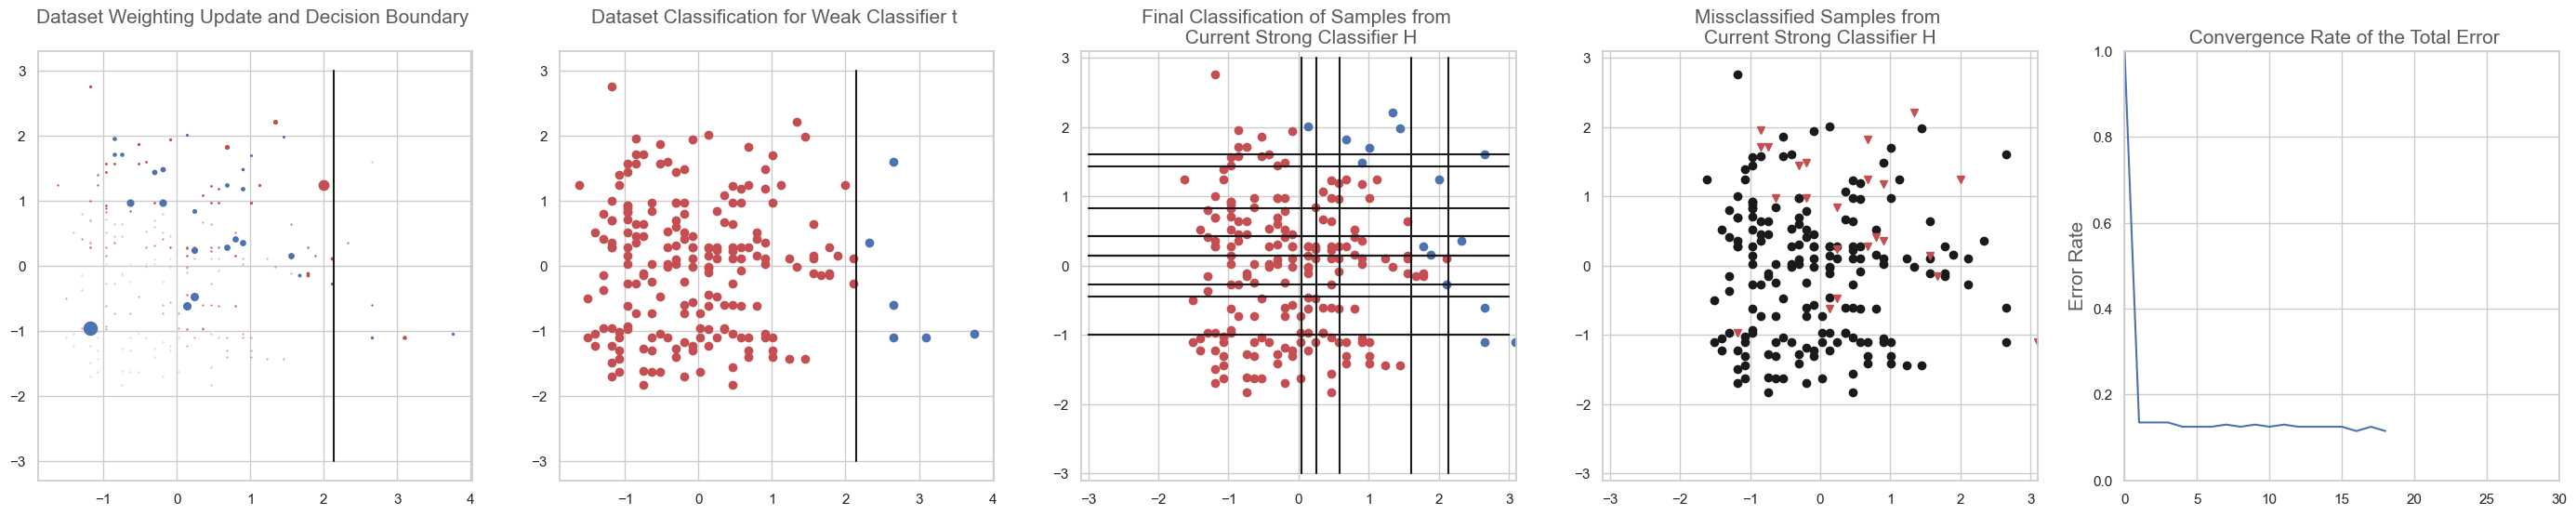

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 19
WEIGHTED ERROR OF DECISION BOUNDARY: 0.44393696164203356 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(-1.0920031713071932), np.float64(1.0))
CURRENT ERROR: 0.125


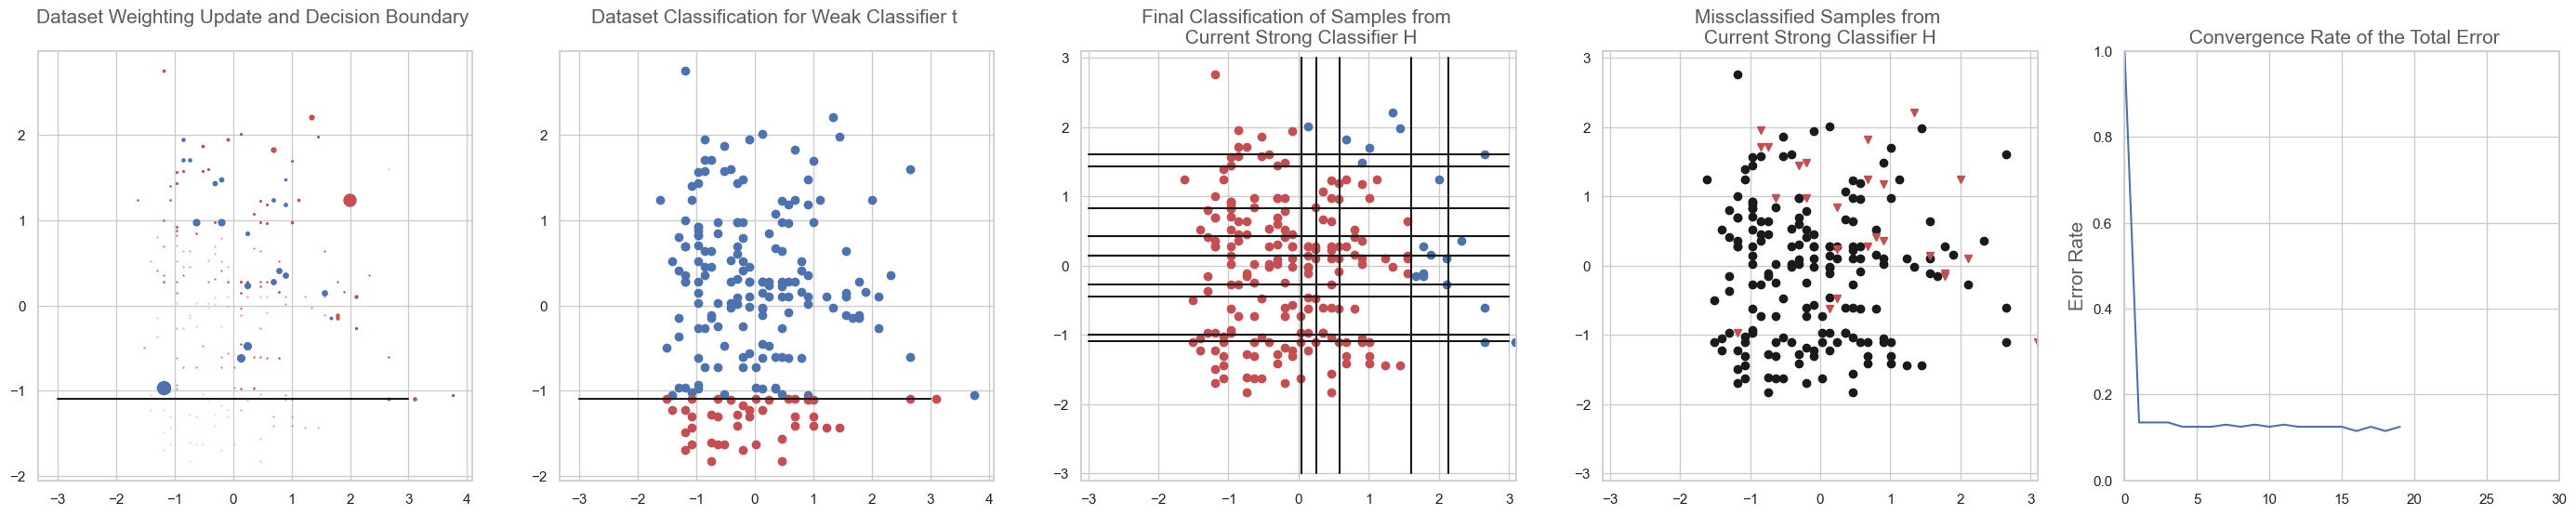

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 20
WEIGHTED ERROR OF DECISION BOUNDARY: 0.43678817707843315 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(-0.267098963046313), np.float64(-1.0))
CURRENT ERROR: 0.115


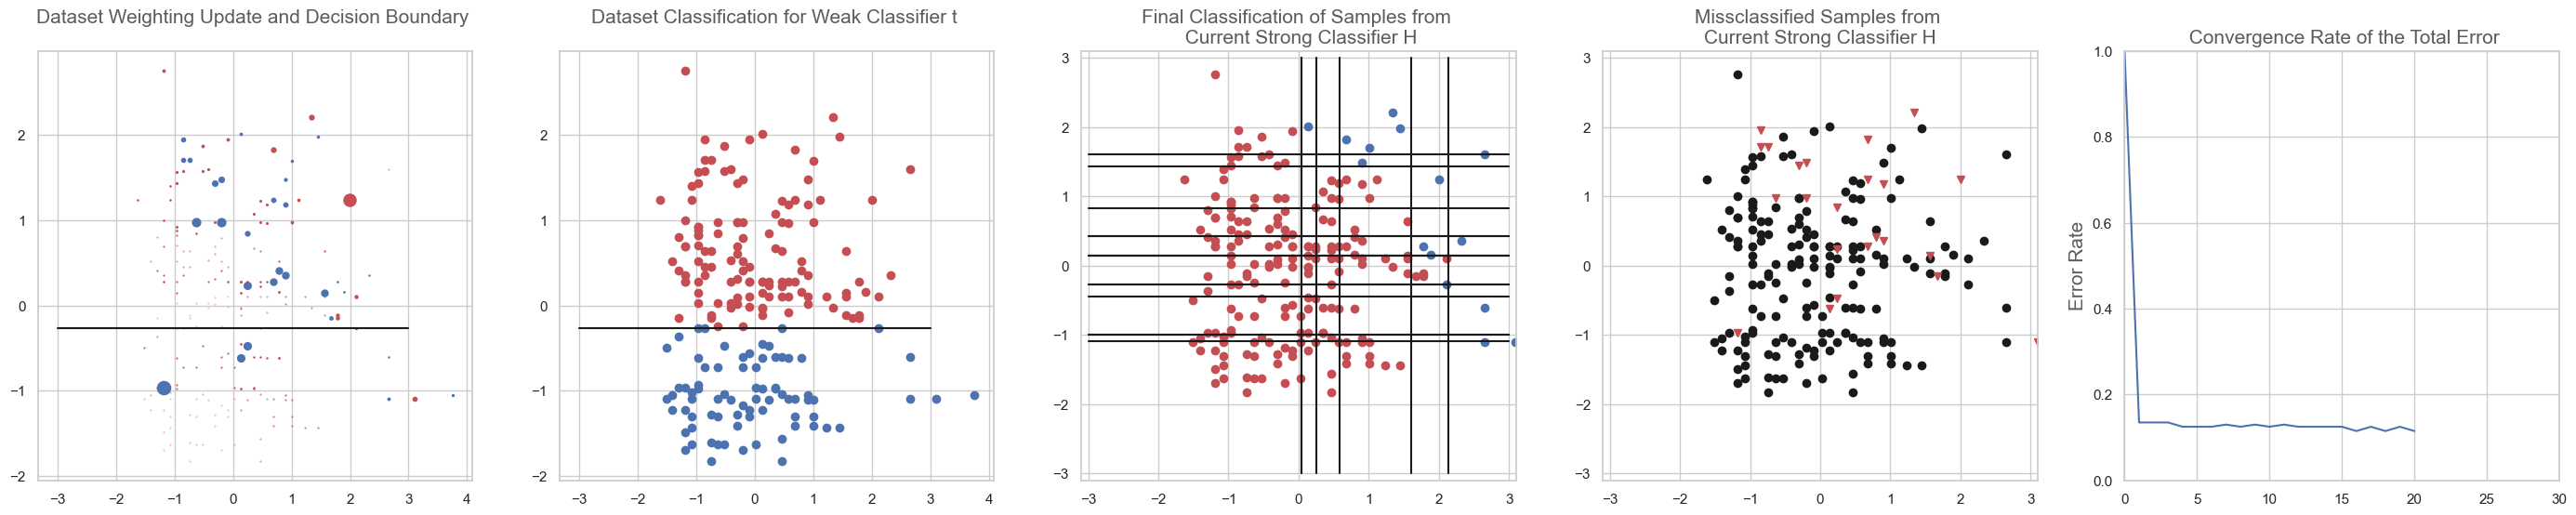

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 21
WEIGHTED ERROR OF DECISION BOUNDARY: 0.44773266520217603 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(0.14535314108412734), np.float64(1.0))
CURRENT ERROR: 0.115


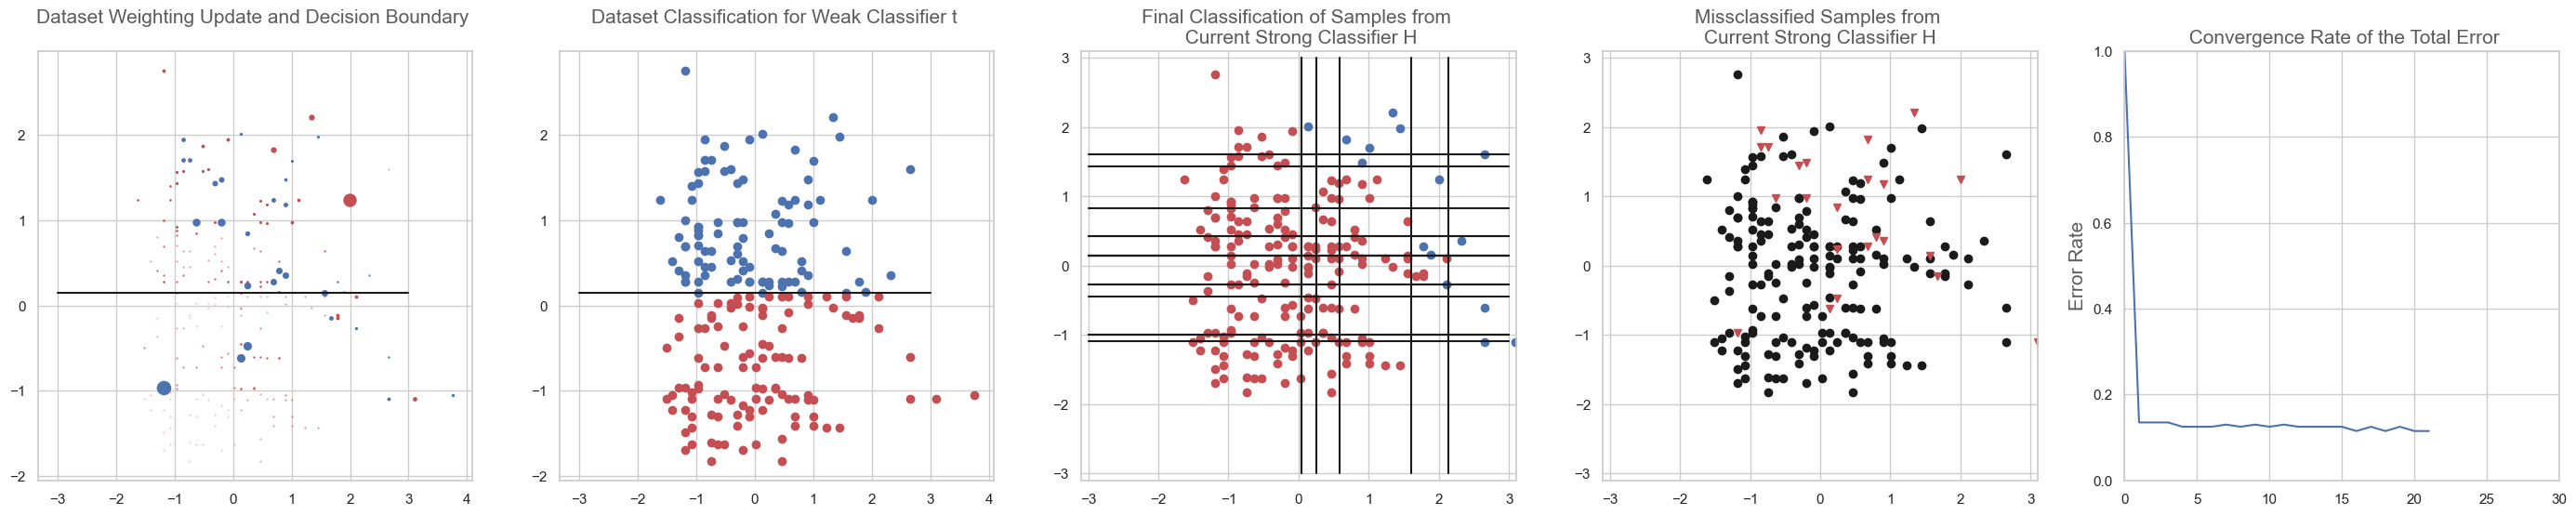

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 22
WEIGHTED ERROR OF DECISION BOUNDARY: 0.4528163744375425 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(0.4203212105044203), np.float64(-1.0))
CURRENT ERROR: 0.115


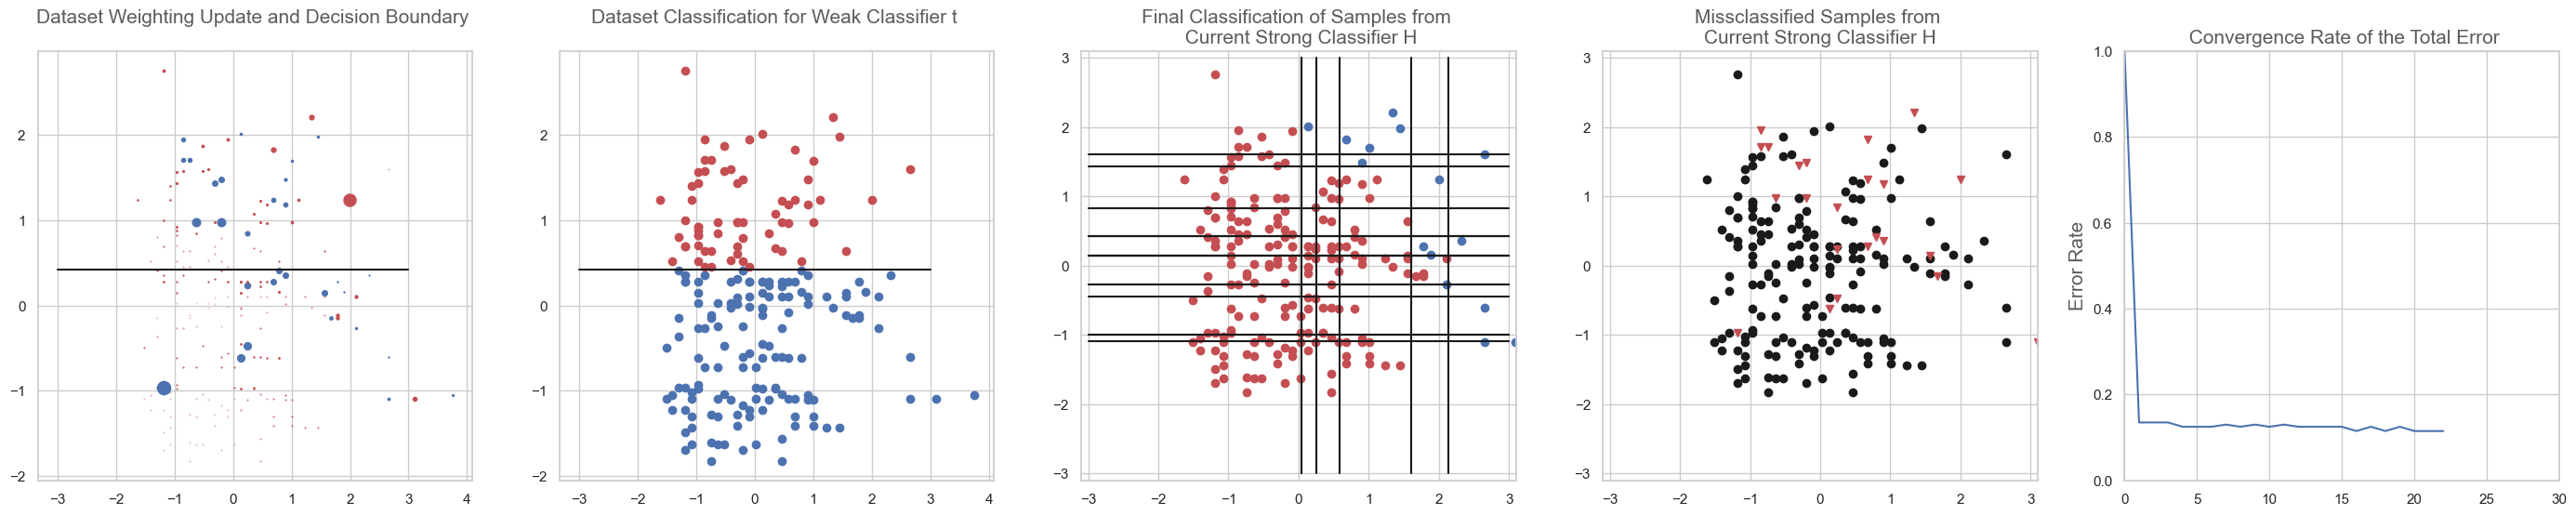

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 23
WEIGHTED ERROR OF DECISION BOUNDARY: 0.44009013092662114 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(1.4285374650454965), np.float64(1.0))
CURRENT ERROR: 0.115


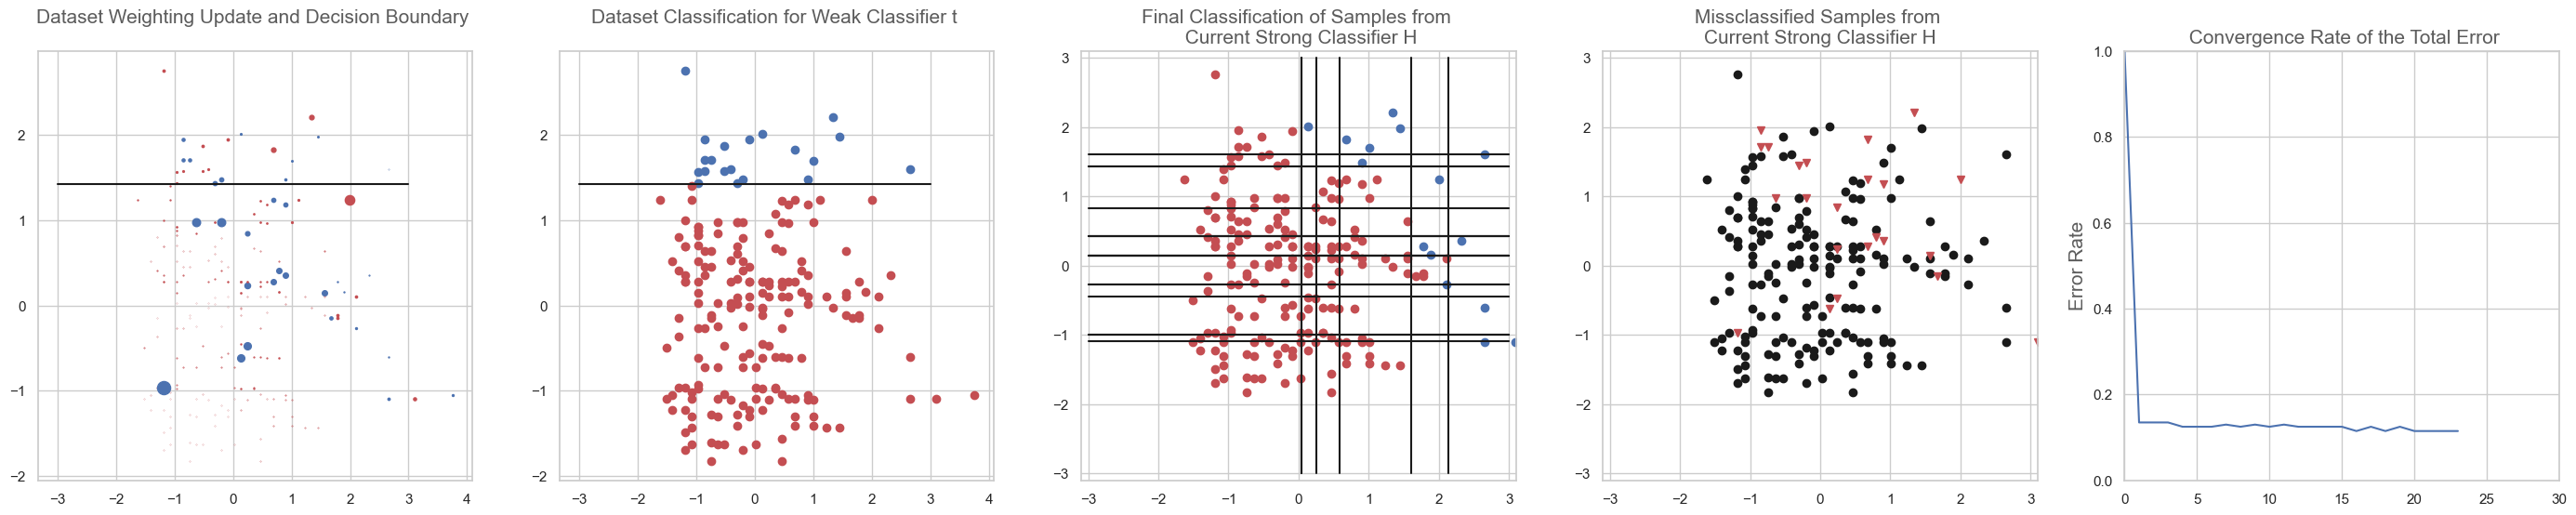

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 24
WEIGHTED ERROR OF DECISION BOUNDARY: 0.4534741142532008 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(-1.0920031713071932), np.float64(1.0))
CURRENT ERROR: 0.115


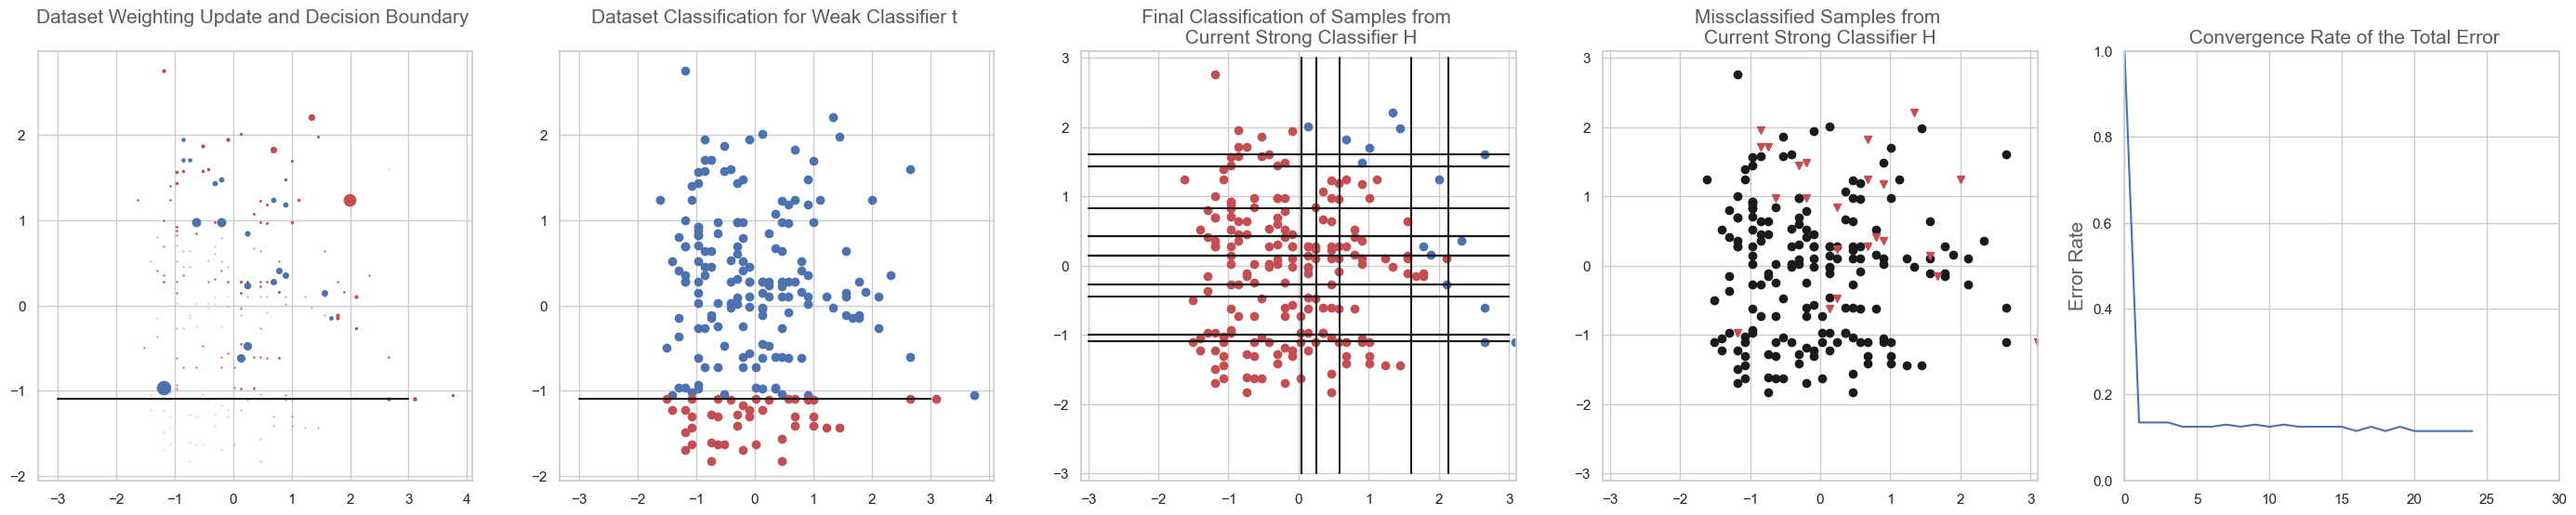

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 25
WEIGHTED ERROR OF DECISION BOUNDARY: 0.4450712913179447 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(2.141553606845989), np.float64(1.0))
CURRENT ERROR: 0.115


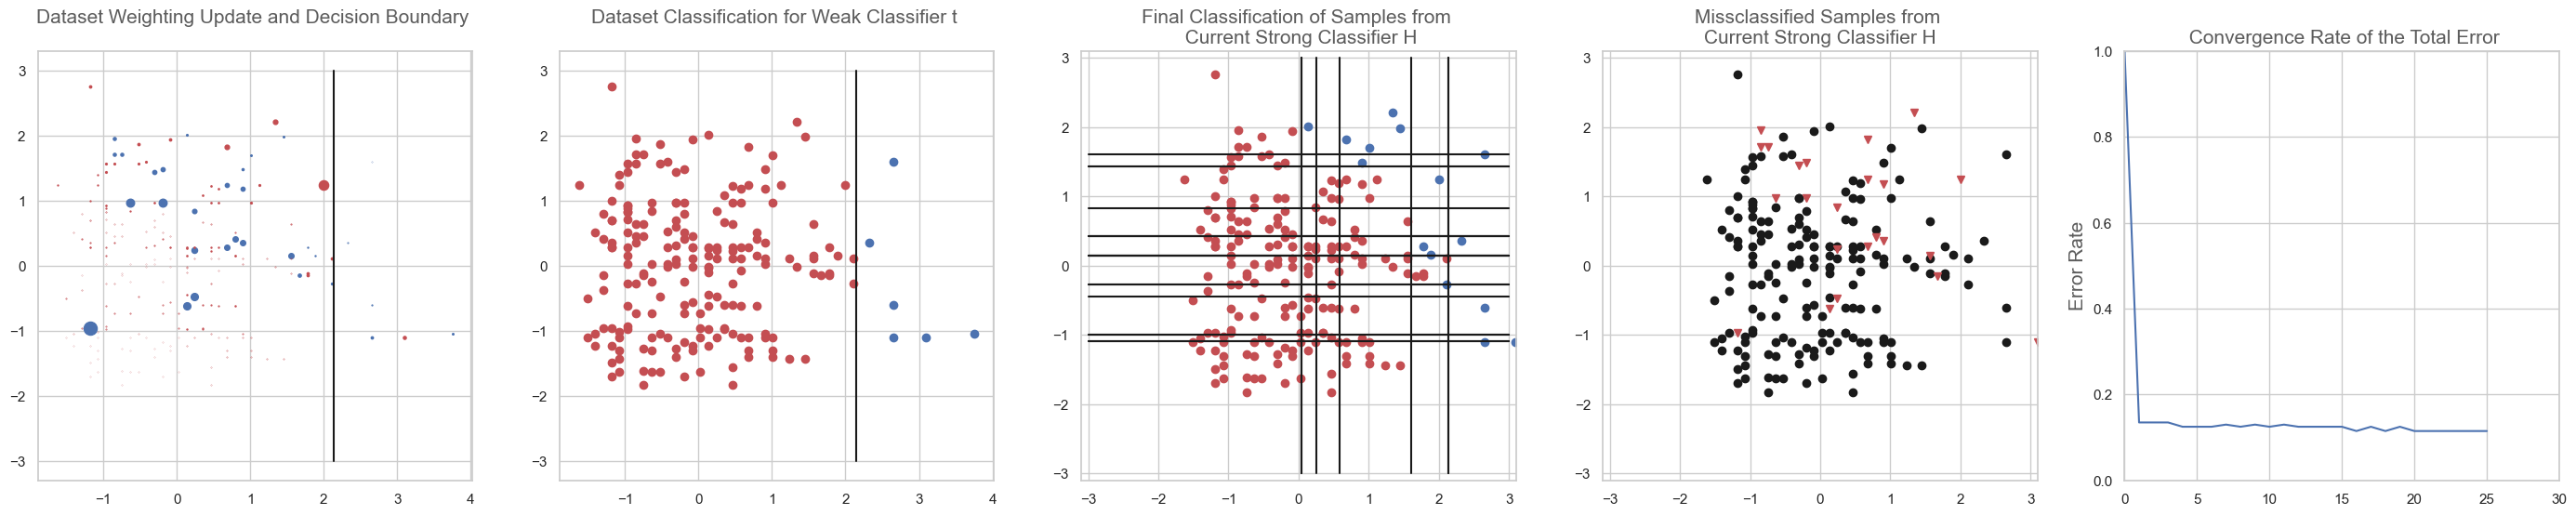

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 26
WEIGHTED ERROR OF DECISION BOUNDARY: 0.45072094754976466 --->> FEATURE, THRESHOLD, DIRECTION: (1, np.float64(1.1993974071952518), np.float64(-1.0))
CURRENT ERROR: 0.115


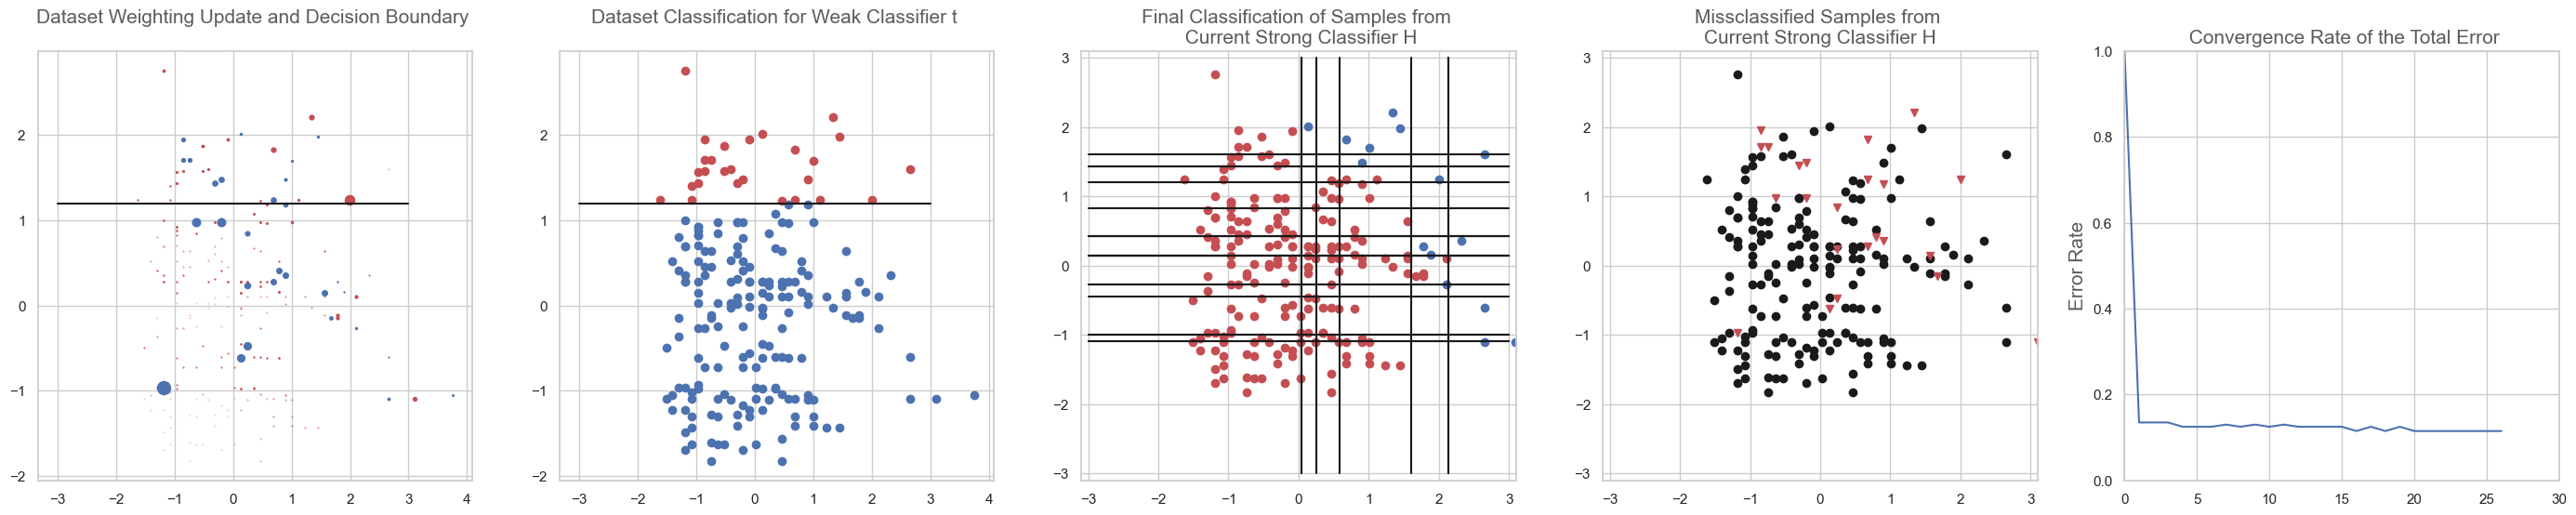

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 27
WEIGHTED ERROR OF DECISION BOUNDARY: 0.457212495295401 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(0.2590500518788603), np.float64(-1.0))
CURRENT ERROR: 0.115


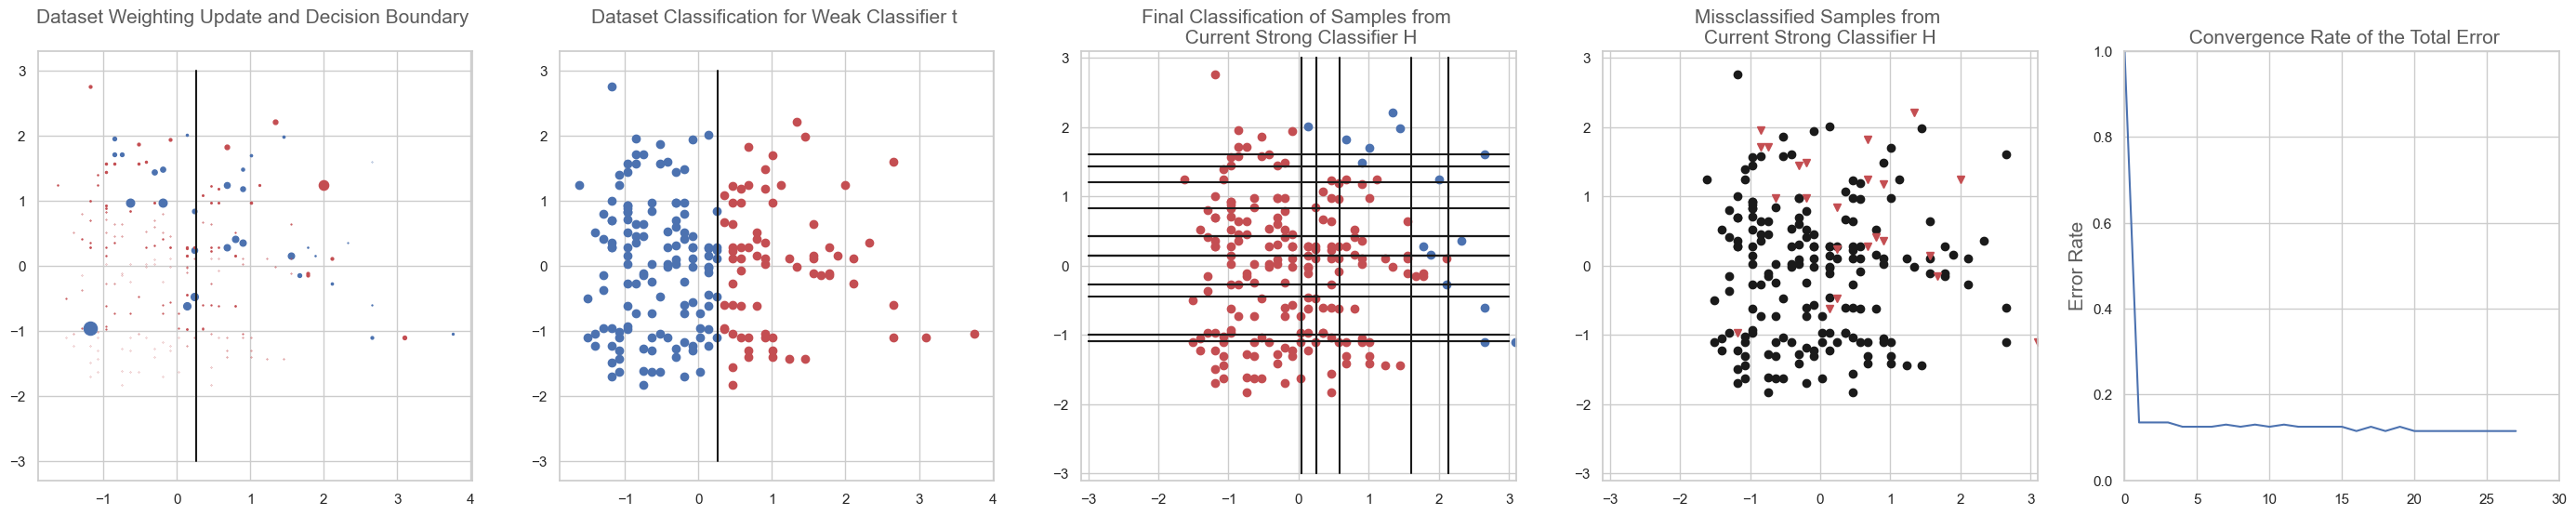

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 28
WEIGHTED ERROR OF DECISION BOUNDARY: 0.4344333720811818 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(0.5817649470160826), np.float64(1.0))
CURRENT ERROR: 0.115


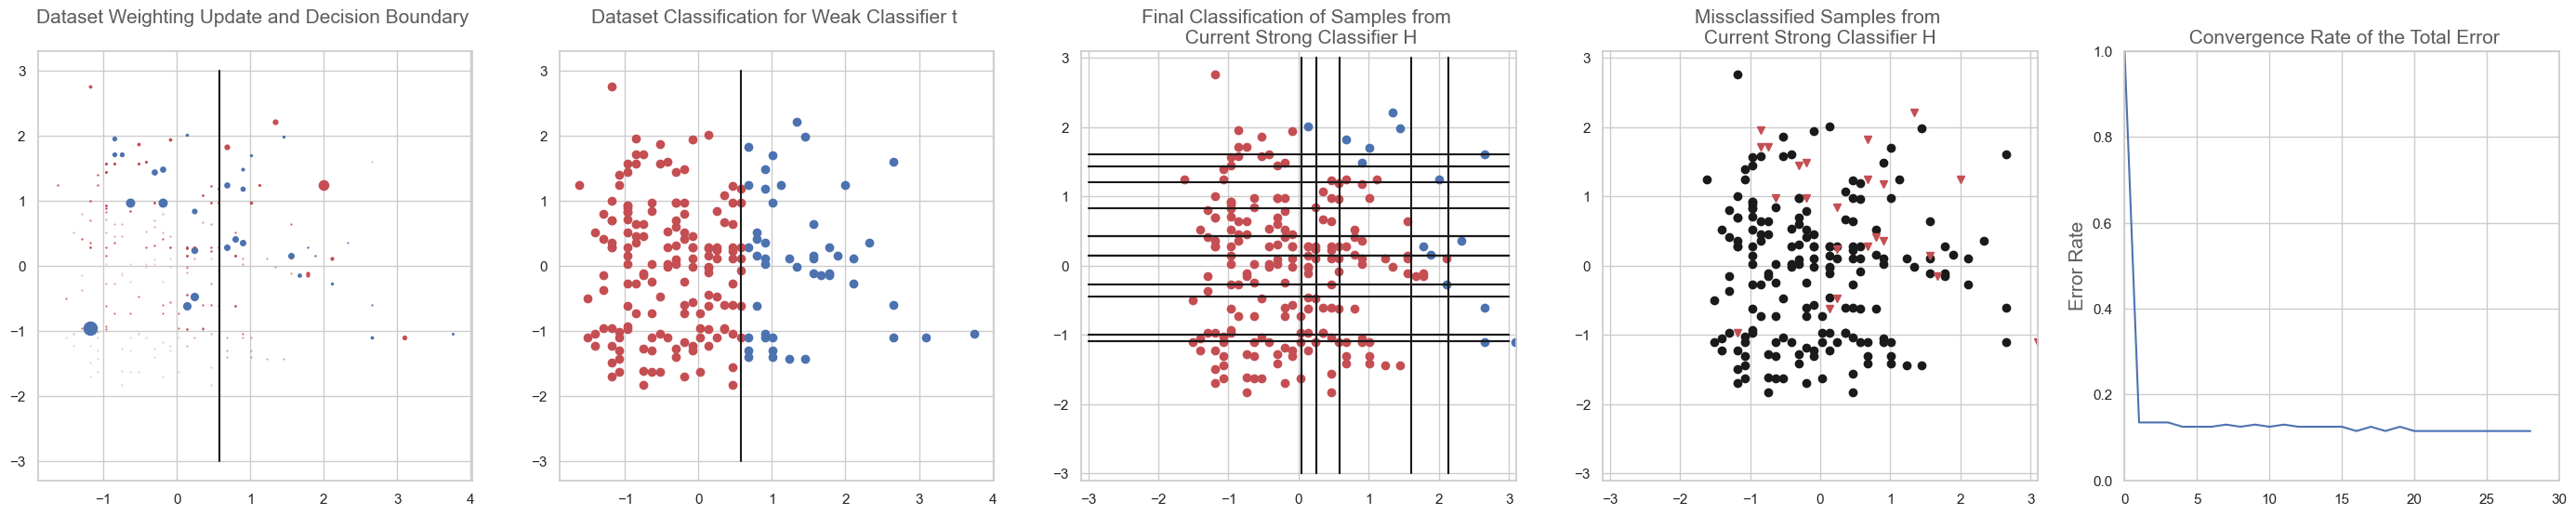

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 29
WEIGHTED ERROR OF DECISION BOUNDARY: 0.46020960949788703 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(-0.9242378969576206), np.float64(1.0))
CURRENT ERROR: 0.115


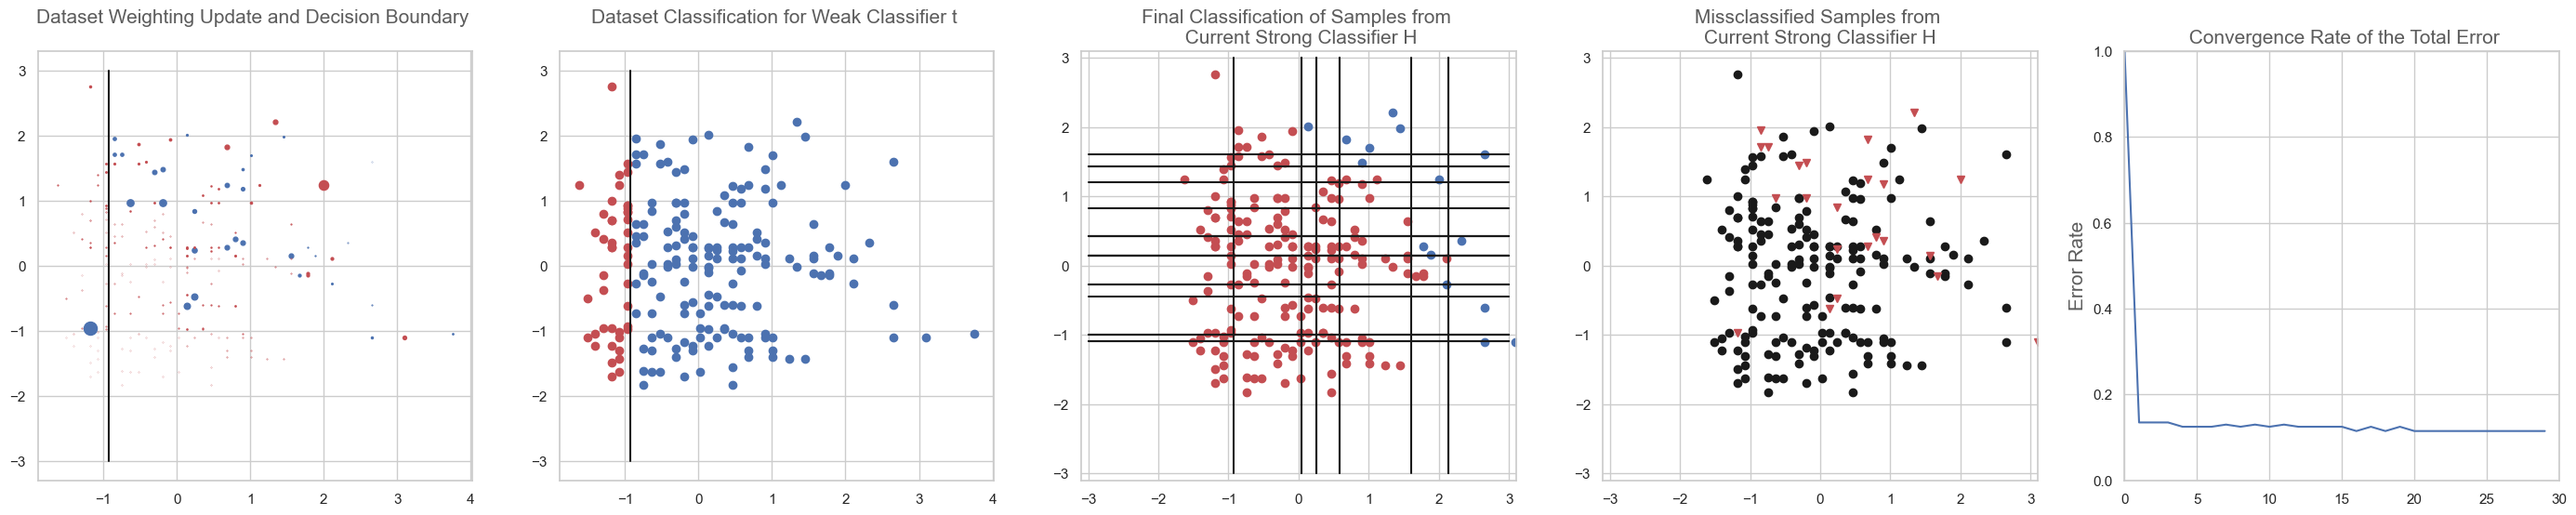

X range(0, 200)
axarr [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
BOOSTING ROUND: 30
WEIGHTED ERROR OF DECISION BOUNDARY: 0.44786486453927177 --->> FEATURE, THRESHOLD, DIRECTION: (0, np.float64(-1.1393811603824353), np.float64(-1.0))
CURRENT ERROR: 0.115


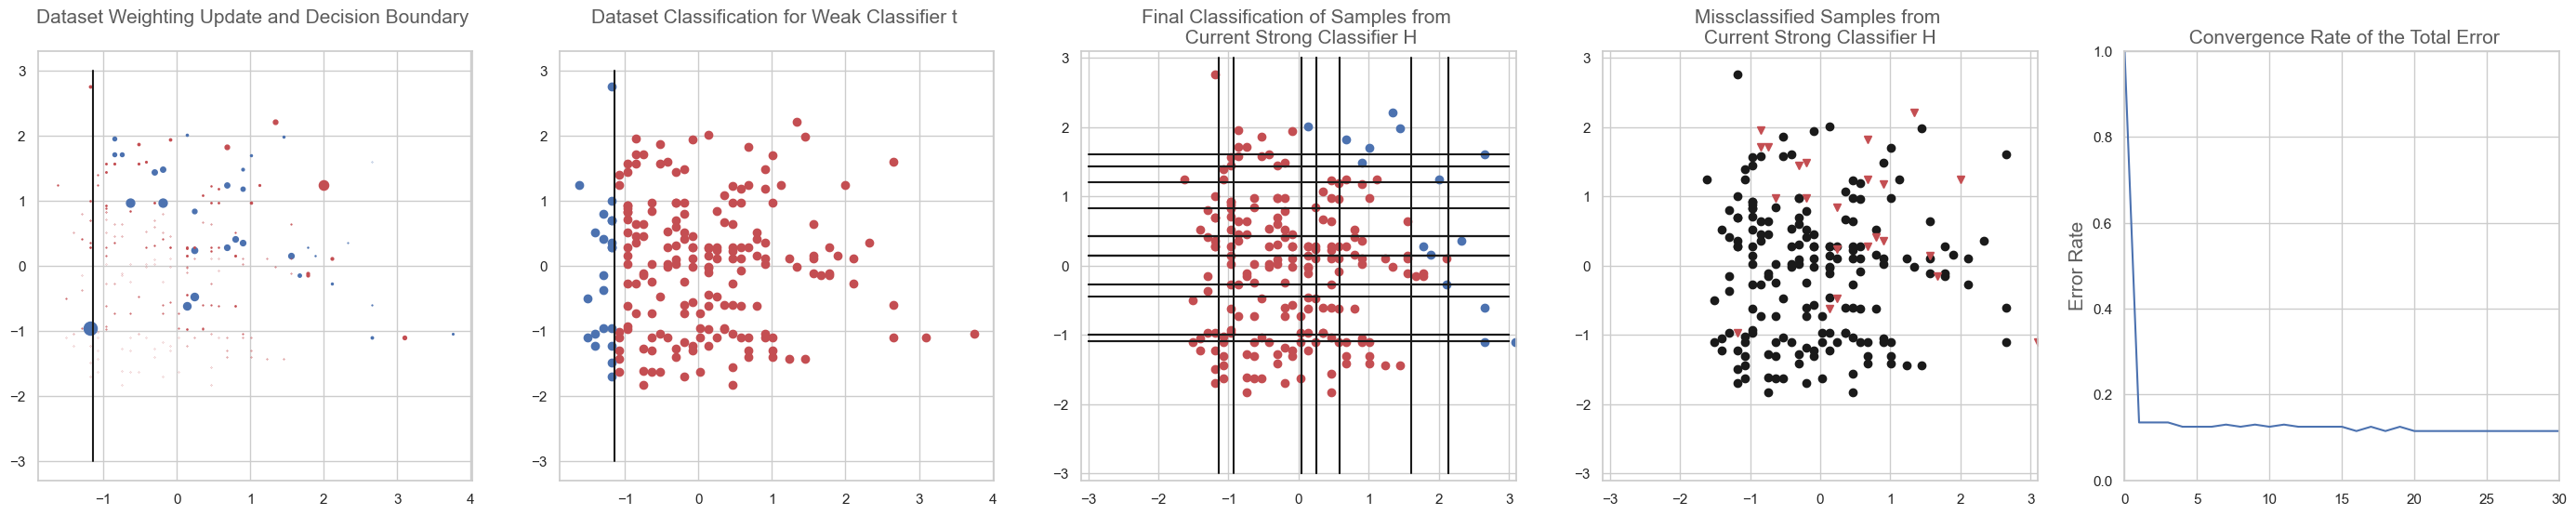

In [23]:
test = Ada_boost(X_scaled,Y,30,visualize = True)

<a id="margins"></a>
## Margins

In [25]:
def sign_of_margin(margin, classification, true_class_label):
    if classification != true_class_label:
        margin *= -1
    return margin
    

In [26]:
def margin_calculation_for_training_samples(sign, pos, neg, tot_votes ):  
    if np.sign(sign) < 0:
        return np.abs(neg) / tot_votes, -1
    else:
        return pos / tot_votes, 1

In [27]:
def margin_calculation(sign, pos, neg, tot_votes):
    return max(pos, neg) / tot_votes


In [28]:
def sum_classifier_votes_for_each_sample(dataset, df, classifier_df):
    for i in range(len(dataset)):
        classification_sum = np.float64(0)
        neg_votes = np.float64(0)
        pos_votes = np.float64(0)

        for idx, thresh, feat, sign, alpha in classifier_df.itertuples():
            prediction = sign * np.sign(dataset[i, int(feat)] - thresh)
            vote = alpha * prediction
            classification_sum += vote
            
            
            if prediction > 0:
                pos_votes += vote
            else:
                neg_votes += abs(vote)
        
        # Store results in the dataframe
        df['sum_alpha'].iloc[i] = classification_sum
        df['pos_votes'].iloc[i] = pos_votes
        df['neg_votes'].iloc[i] = neg_votes

    return df


In [29]:
def compute_signed_margins(X, Y, classifier_df):
    total_alpha_votes = np.sum(classifier_df.alpha)

    df = pd.DataFrame(X.copy())
    df['sum_alpha'] = 0
    df['pos_votes'] = 0
    df['neg_votes'] = 0

    df = sum_classifier_votes_for_each_sample(X, df, classifier_df)

    result = df[['sum_alpha','pos_votes','neg_votes']].copy()
    result['total_alpha_votes'] = total_alpha_votes

    margins = result.apply(lambda row: margin_calculation_for_training_samples(*row), axis=1)
    df['margin'] = margins.apply(lambda x: x[0])
    df['classification'] = margins.apply(lambda x: x[1])
    df['true_class_label'] = Y
    df['sign_of_margin'] = df[['margin', 'classification', 'true_class_label']].apply(lambda x: sign_of_margin(*x), axis=1)

    return df['sign_of_margin']


Higher number of rows are used in this task ,so the models can learn the patterns more easily

In [31]:
Training_data = df[["loan_percent_income","loan_int_rate","loan_status"]][:10000]

In [32]:
X = Training_data.drop("loan_status",axis = 1)
Y = Training_data["loan_status"]

In [33]:
Y = Y.replace({0: -1, 1: 1})

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42, stratify=Y )

In [35]:
cdf_results = {}

boosting_rounds = list(range(10, 201, 10))
model_list = {}
for T in boosting_rounds:
    model = Ada_boost(X_train, y_train, T)
    signed_margins = compute_signed_margins(model.x_train, model.y_train, model.classifier_df)
    cdf_results[T] = signed_margins
    model_list[f"model_with_n_{T}"] = model

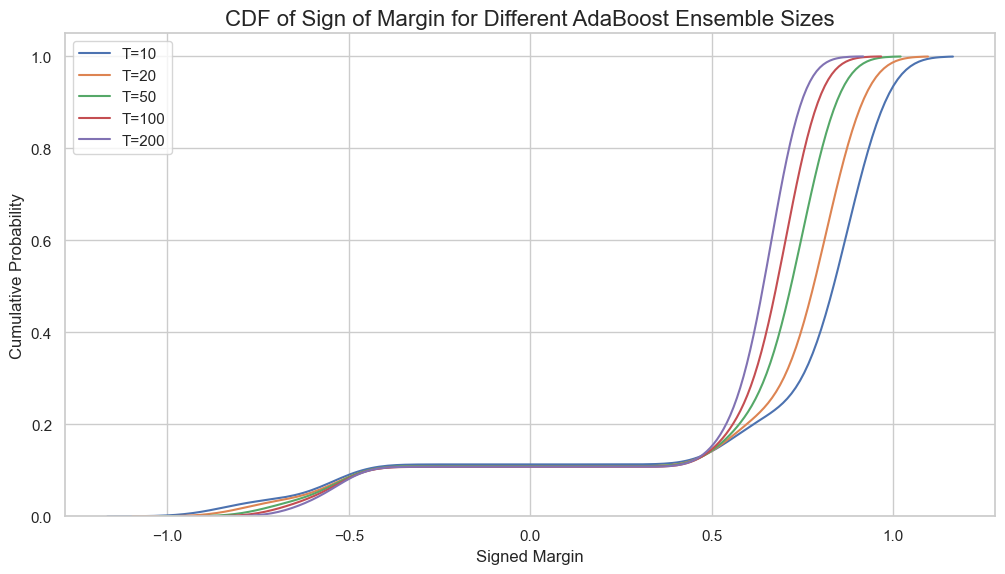

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.rcParams['figure.dpi'] = 100       
plt.rcParams['figure.figsize'] = (12, 6.27)


include = [10,20,50,100,200]

for T, margins in cdf_results.items():
    if T in include:
        sns.kdeplot(data=margins, cumulative=True, fill=False, label=f"T={T}")

plt.title("CDF of Sign of Margin for Different AdaBoost Ensemble Sizes", fontsize=16)
plt.xlabel("Signed Margin", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
As seen from the graph increasing the number of boosting rounds of ada boost has affected margin values. At 10 boosting rounds margin of the classifiers are evenly spread from -1 to 1 but as the number of boosting rounds increase the number of missclassifications have dropped and most classifiers have a margin between 0.5 to 0.7 .Number of classifiers with high margins and low margins in T =  10 algorithm get concentrated between 0.5 and 0.7 as the number of boosting rounds are increased

Overall performance of the trained models should be measured to decide on the optimal number of boosting rounds

In [39]:
class_counts = y_test.value_counts()
class_counts



loan_status
-1    1707
 1     293
Name: count, dtype: int64

There is a class imbalace in the rows we have chosen to train our data. Most rows are negative. therefore metrics such as F1 and recall which ignore true negatives should not be used in our data analysis

Accuracy metric can also indicate poorly under a dataset with class imbalance

##### Area under the ROC Curve

Area under the ROC Curve metric can be used to adress the class imbalance . As true negatives and false negatives are considered in the calculation of TPR and FPR in ROC graph.

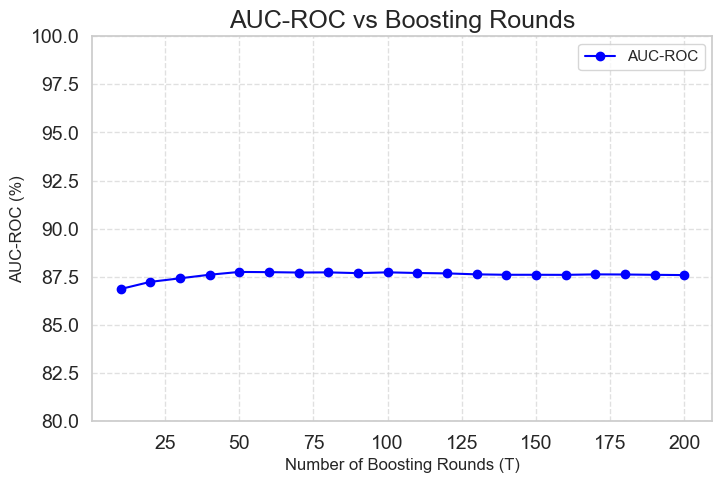

In [44]:
from sklearn.metrics import roc_auc_score

t_values = []
auc_values = []

for name, model in model_list.items():
    T = int(name.split("_")[-1])
    
    X_test_np = np.asarray(X_test)
    
    y_scores = model.predict_proba(X_test_np)
    
    auc = roc_auc_score(y_test, y_scores) * 100
    
    t_values.append(T)
    auc_values.append(auc)
    

pairs = list(zip(t_values, auc_values))
pairs.sort()
t_values, auc_values = zip(*pairs)


plt.figure(figsize=(8, 5))
plt.plot(t_values, auc_values, marker='o', linestyle='-', color='blue', label='AUC-ROC')
plt.ylim(80, 100) 
plt.tick_params(axis='both', labelsize=14)
plt.xlabel("Number of Boosting Rounds (T)", fontsize=12)
plt.ylabel("AUC-ROC (%)", fontsize=12)
plt.title("AUC-ROC vs Boosting Rounds", fontsize=18 )
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()



According to the graph the model classifies the samples between negatives and positives slightly better as the number of boosting rounds are increased

##### Matthew's correlation coefficient (MCC)

MCC uses all four elements of the confusion metrics. Therefore it is appropriate to adress the case of class imbalance

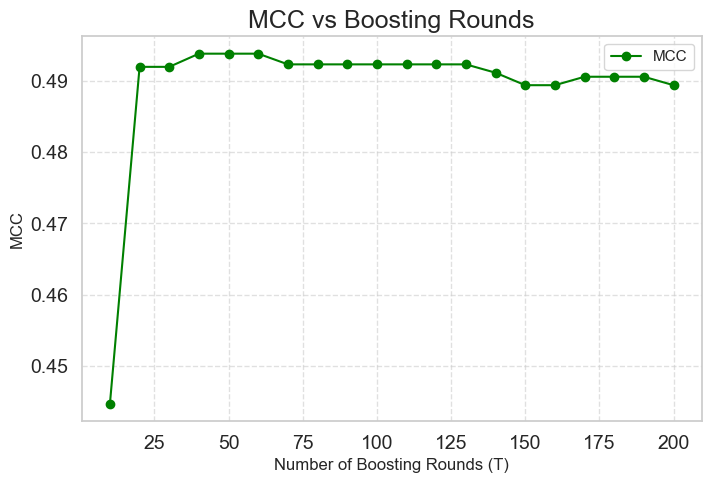

In [48]:
from sklearn.metrics import matthews_corrcoef

t_values = []
mcc_values = []

for name, model in model_list.items():

    T = int(name.split("_")[-1])

    X_test_np = np.asarray(X_test)
    
    y_pred = model.predict(X_test_np)

    mcc = matthews_corrcoef(y_test, y_pred)
    
    t_values.append(T)
    mcc_values.append(mcc)

pairs = list(zip(t_values, auc_values))
pairs.sort()
t_values, auc_values = zip(*pairs)

plt.figure(figsize=(8,5))
plt.plot(t_values, mcc_values, marker='o', linestyle='-', color='green', label='MCC')
plt.xlabel("Number of Boosting Rounds (T)", fontsize=12)
plt.ylabel("MCC", fontsize=12)  
plt.title("MCC vs Boosting Rounds", fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(axis='both', labelsize=14)
plt.legend()
plt.show()


Models with values of T between 40 and 60 have higher MCC statistic. These models are better at predictions. The models get worse as number of boosting rounds exceed 130

##### Cohen's Kappa


Cohen's kappa uses all four elements of the confusion matrix in it's probality calculation. Therefore the statistic is suitable for the dataset

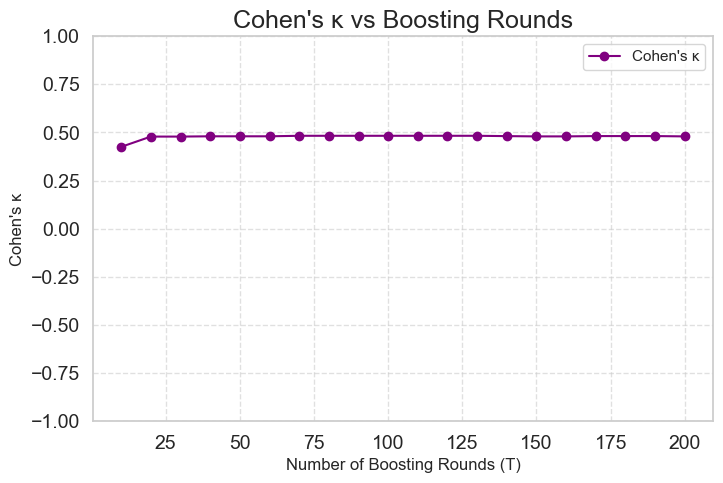

In [50]:
from sklearn.metrics import cohen_kappa_score

t_values = []
kappa_values = []

for name, model in model_list.items():

    T = int(name.split("_")[-1])

    X_test_np = np.asarray(X_test)
    y_pred = model.predict(X_test_np)

    kappa = cohen_kappa_score(y_test, y_pred) 

    t_values.append(T)
    kappa_values.append(kappa)

pairs = list(zip(t_values, auc_values))
pairs.sort()
t_values, auc_values = zip(*pairs)

plt.figure(figsize=(8, 5))
plt.plot(t_values, kappa_values, marker='o', linestyle='-', color='purple', label="Cohen's κ")
plt.xlabel("Number of Boosting Rounds (T)", fontsize=12)
plt.ylabel("Cohen's κ", fontsize=12)  
plt.title("Cohen's κ vs Boosting Rounds", fontsize=18)
plt.ylim(-1, 1)        
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(axis='both', labelsize=14)
plt.legend()
plt.show()


Cohen's kappa ≈ 50 when T > 30 . This indicates moderate agreement between ground truth and the predicted labels. Cohen Kappa statistic doesn't change as T reaches 200

lift statistic will not be used on this datset as lift is calculated using recall values and recall does not consider true negatives and false negatives

<a id="weak-classifiers-experimentation"></a>
## Weak classifiers experimentation

<a id="adjusted-focus"></a>
## Adjusted focus

<a id="pruning"></a>
## Pruning

# TASK 2

<a id="tuning"></a>
## Tuning

# TASK 3

<a id="other-algorithms"></a>
## Other algorithms

<a id="hyperparameter-tuning"></a>
## Hyperparameter tuning

<a id="feature-selection"></a>
## Feature selection

<a id="accuracies"></a>
## Accuracies

# TASK 4

<a id="aws"></a>
## AWS